In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

#df_anno = pd.read_feather("anno.feather")
df_anno = pd.read_feather("anno_JAM_TEST.feather")     # UPDATE TO LATEST WHEN AVAILABLE

In [3]:
df_anno

,exp_component_name_id,exp_component_name_label,exp_component_name_color,layer_id,layer_label,layer_color,batch_id,batch_label,batch_color,cell_name_id,...,Tree_first_cor_id,Tree_first_cor_color,Tree_second_cor_id,Tree_second_cor_color,Tree_third_cor_id,Tree_third_cor_color,Tree_call_id,Tree_call_color,Old_call_id,Old_call_color
0,1477,SM-GE4QD_S054_E1-50,#56157D,9,1,#997F45,102,RSC-205,#C33C75,2211,...,5190,#FF1919,4730,#FF4A4A,4801,#FF7878,1,#FF7373,2,#85CC3D
1,1478,SM-GE4QD_S055_E1-50,#56157D,9,1,#997F45,102,RSC-205,#C33C75,2212,...,5195,#FF1818,4749,#FF4848,4735,#FF8181,1,#FF7373,2,#85CC3D
2,3152,SM-GE672_S084_E1-50,#D0416F,12,3,#999200,50,RSC-139,#53137D,104,...,4082,#FF5A5A,4060,#FF8181,4206,#FFC0C0,1,#FF7373,2,#85CC3D
3,1490,SM-GE4QD_S067_E1-50,#57157E,9,1,#997F45,102,RSC-205,#C33C75,2224,...,3883,#FF6464,3652,#FFA4A4,4354,#FFB0B0,1,#FF7373,2,#85CC3D
4,1774,SM-GE4RS_S163_E1-50,#6B1D81,9,1,#997F45,107,RSC-211,#CD4071,1886,...,3939,#FF6262,3874,#FF9090,4258,#FFB9B9,1,#FF7373,2,#85CC3D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,1277,SM-D9D94_S26_E1-50,#481078,18,6,#66992E,36,RSC-082,#341069,4038,...,1,#00008B,1,#00008B,1,#00008B,6,#992E99,4,#8000
5575,1278,SM-D9E4N_S05_E1-50,#481078,18,6,#66992E,37,RSC-084,#37106B,4039,...,1,#00008B,1,#00008B,1,#00008B,6,#992E99,4,#8000
5576,1279,SM-D9E5H_S36_E1-50,#481078,18,6,#66992E,38,RSC-085,#390F6D,4040,...,1,#00008B,1,#00008B,1,#00008B,6,#992E99,4,#8000
5577,1280,SM-D9E5I_S28_E1-50,#481078,18,6,#66992E,38,RSC-085,#390F6D,4041,...,1,#00008B,1,#00008B,1,#00008B,6,#992E99,4,#8000


In [5]:
np.unique(df_anno['virus_label'])

array(['', '0', 'CN1390', 'CN1457', 'CN1633', 'CN1816', 'CN1818',
       'CN1827', 'CN1954', 'CN1955', 'CN2039', 'CN2360', 'CN2365',
       'CN2374', 'CN2379', 'CN2602', 'CN3556', 'CN3583', 'CN3596', 'None',
       'ZZ_Missing'], dtype=object)

In [6]:
df_anno[df_anno['virus_label']=='CN1390']['subclass_label'].value_counts()

SST                 126
PVALB                89
LAMP5/PAX6/Other     31
VIP                  12
Chandelier            8
Sst Chodl             5
L4 IT                 4
L6 CT                 4
L6 IT                 3
L5/6 NP               3
L6b                   2
L5 IT                 1
Name: subclass_label, dtype: int64

In [7]:
df_ephys = pd.read_csv("snakemake_ephys/Human_ephys_features.csv")    # Does this need updating too?

In [8]:
df_id = pd.read_csv("custom_report.csv")

In [9]:
df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

len(df2)

2932

In [10]:
anno_names = set(df_anno['cell_name_label'])
id_names = set(df_id['cell_specimen_name '])

missing = id_names-anno_names
inds_miss = [str in list(missing) for str in df_id['cell_specimen_name ']]
df_id_missing = df_id[inds_miss]
len(df_id_missing)   # 1224+2649 = 3873
df_id_missing['recording_date '][-460:] 

2148    2019-06-04 00:37:03
2153    2019-06-03 21:41:26
2155    2019-06-03 23:16:19
2156    2019-06-03 23:42:16
2169    2019-06-03 19:07:45
               ...         
3868    2023-04-13 18:40:02
3869    2023-04-13 19:27:23
3870    2023-04-13 19:57:36
3871    2023-04-13 21:27:28
3872    2023-04-13 22:27:41
Name: recording_date , Length: 460, dtype: object

(array([39., 30.,  4.,  2.,  3.,  0.,  6.,  6., 12., 15., 17., 24.,  9.,
        30., 35., 36.,  9., 15., 37., 26., 17., 19.,  9.,  6., 18., 16.,
        27., 18.,  3., 10., 16.,  9.,  4., 11.,  5.,  1., 11., 16., 19.,
        28., 22., 20., 35., 26., 28., 18.,  5., 14., 77., 78.]),
 array([   0.  ,   77.44,  154.88,  232.32,  309.76,  387.2 ,  464.64,
         542.08,  619.52,  696.96,  774.4 ,  851.84,  929.28, 1006.72,
        1084.16, 1161.6 , 1239.04, 1316.48, 1393.92, 1471.36, 1548.8 ,
        1626.24, 1703.68, 1781.12, 1858.56, 1936.  , 2013.44, 2090.88,
        2168.32, 2245.76, 2323.2 , 2400.64, 2478.08, 2555.52, 2632.96,
        2710.4 , 2787.84, 2865.28, 2942.72, 3020.16, 3097.6 , 3175.04,
        3252.48, 3329.92, 3407.36, 3484.8 , 3562.24, 3639.68, 3717.12,
        3794.56, 3872.  ]),
 <BarContainer object of 50 artists>)

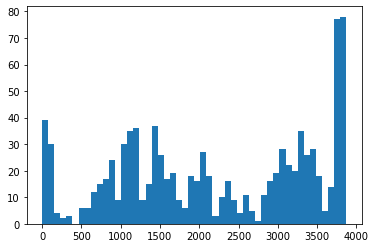

In [11]:
plt.hist(df_id_missing.index, bins = 50)

In [10]:
# OPTIONAL SUBSET ROI - e.g., remove hippocampus

In [12]:
df2['layer_label'].value_counts()

3          823
4          439
2          335
_5         324
5          224
1          218
3b          85
3a          71
3c          52
HIPbCA1     43
PCx_5       40
_6          33
_4          33
CBX_mo      29
6           29
PCx4        18
OCx3        18
_3          13
PCx_3       11
OCx2         9
PCx1         6
OCx4         6
_2           6
OCx5         5
OCx3c        5
CCx_5        5
HIPbCA3      5
PCx3a        4
PCx3b        4
HIPbCA2      4
OCx3a        4
2.5          3
ICx_5        3
PCx_4        3
CB           3
PCx3c        3
PCx5         3
PCx2         2
PCx3         2
CCx_6        2
OCx3b        1
OCx1         1
HIPbDG       1
PCx_6        1
PCx_3c       1
_3c          1
_3a          1
Name: layer_label, dtype: int64

In [13]:
df2['roi_label'].value_counts()[1:20]

TCx_L4      366
TCx_L2      244
TCx_L_L5    201
TCx_L1      195
FCx_L3      184
TCx_L5      147
FCx_L_L5    123
FCx_L2       91
TCx_L3b      80
FCx_L5       73
FCx_L4       72
TCx_L3a      63
TCx_L3c      47
HIPbCA1      43
PCx_L_L5     40
CBX_mo       29
TCx_L_L6     23
FCx_L1       23
TCx_L_L4     21
Name: roi_label, dtype: int64

In [14]:
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
len(df3)

2928

In [15]:
df3['subclass_label']

0           VIP
1           VIP
2         PVALB
3         L5 IT
4       L2/3 IT
         ...   
2923      L5 IT
2924      L5 IT
2925      L6 CT
2926      L6 IT
2927    L5/6 NP
Name: subclass_label, Length: 2928, dtype: object

<Axes: xlabel='subclass_label', ylabel='width_rheo'>

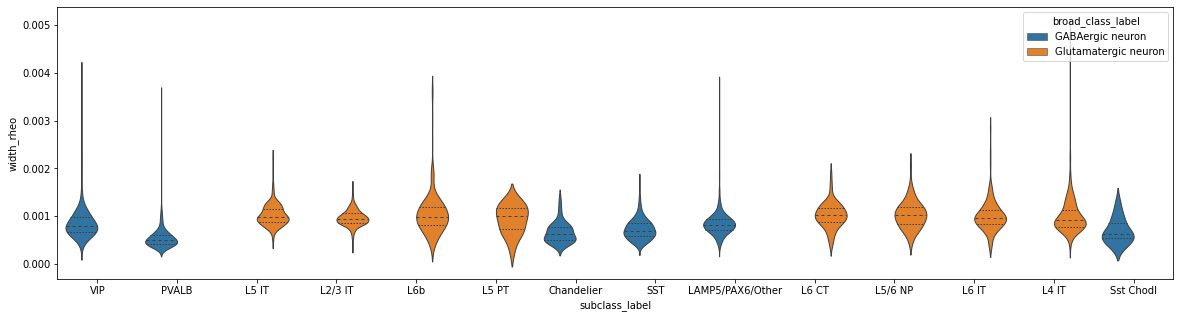

In [16]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df3, x="subclass_label", y="width_rheo", hue="broad_class_label",
               split=False, inner="quart", linewidth=1)

In [17]:
# Has this been QC filtered? check params
#df3_filt = df3[df3['rna_amplification_pass_fail_label']=='Pass']
#print(len(df3_filt))
df3_filt = df3[df3['percent_reads_aligned_total_label']>=50]
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['genes_label']>=1500]
print(len(df3_filt))

df3_filt = df3_filt[df3_filt['marker_sum_norm_label']>=0.45]
print(len(df3_filt))

# OPTIONAL: Filter by layer
#inds = np.array([any([x in layer for x in ['4','5','6']]) and '.' not in layer for layer in df3_filt['layer_label']])
#df3_filt = df3_filt[inds]
#print(len(df3_filt))

2822
2815
2154


In [18]:
df3_filt['subclass_label'].value_counts()

SST                 358
PVALB               344
L2/3 IT             343
LAMP5/PAX6/Other    312
L4 IT               263
L5 IT               210
VIP                 155
L6 IT                54
L6 CT                36
L5/6 NP              35
Chandelier           25
Sst Chodl             8
L6b                   7
L5 PT                 4
Name: subclass_label, dtype: int64

In [19]:
df3_filt.columns.get_loc('upstroke_downstroke_ratio_short_square')  # First ephys feature column

340

In [20]:
df_ephys_sub = df3_filt.iloc[:,340:432]
df_ephys_sub.reset_index(inplace=True, drop=True)

df3_filt.reset_index(inplace=True, drop=True)

In [21]:
df_ephys_sub.columns

Index(['upstroke_downstroke_ratio_short_square', 'threshold_v_short_square',
       'width_short_square', 'upstroke_short_square',
       'downstroke_short_square', 'width_suprathresh_short_square',
       'peak_deltav_short_square', 'sag', 'sag_area', 'sag_tau', 'v_baseline',
       'rheobase_i', 'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo', 'threshold_v_rheo',
       'peak_v_rheo', 'width_rheo', 'upstroke_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'postap_slope_rheo', 'fast_trough_v_last_rheo', 'adp_v_last_rheo',
       'adapt_hero', 'avg_rate_hero', 'latency_hero', 'mean_isi_hero',
       'median_isi_hero', 'isi_cv_hero', 'ir_late_hero',
       'upstroke_downstroke_ratio_hero', 'threshold_v_hero', 'peak_v_hero',
       'width_hero', 'upstroke_hero', 'downstroke_hero',
       'width_suprathres

In [22]:
# Optionally run this to remove outliers
from scipy.stats import skew
if 'PV' in df_ephys_sub.columns:
    df_ephys_sub = df_ephys_sub.drop(['PV'], axis=1)

keep = set(np.arange(len(df_ephys_sub)))
feat_outliers = []
df_ephys_sub_no_outliers = df_ephys_sub.copy()
for feat in df_ephys_sub.columns:    
    sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
    if sk > 5:     # If very right skewed, log transform
        if any(df_ephys_sub[feat] == 0):
            #min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
            A = np.array(df_ephys_sub['width_rheo'][df_ephys_sub['width_rheo']!=0])    # Should be feat, but gets noisy
            k = 3
            idx = np.argpartition(A, k)
            print(A.shape)
            print(idx)
            print('k:', k)
            print(idx[:k])
            print("mins:", A[idx[:k]])
            print("mean:", np.nanmean(A))
            min_nonzero = np.mean(A[idx[:k]])
            print(min_nonzero)
            feat_vals = np.log(df_ephys_sub[feat]+min_nonzero)     # Careful creates a histogram bump at 0
        else:
            feat_vals = np.log(df_ephys_sub[feat])     
        # Be careful whether you want to add 0, but it's largely not counts, so not often zero?
    else:
        feat_vals = df_ephys_sub[feat]
    Q1 = np.nanpercentile(feat_vals, 25)
    Q3 = np.nanpercentile(feat_vals, 75)
    IQR = Q3 - Q1

    thresh = 2.0
    while True: 
        # Above Upper bound
        upper=Q3+thresh*IQR
        nz_inds_upper = np.nonzero(np.array(feat_vals>upper))
        #upper_array=np.array(df_ephys_sub[feat].iloc[nz_inds[0]])
        #print("Upper Bound:",upper)
        #print(df_ephys_sub[feat][upper_array])
 
        #Below Lower bound
        lower=Q1-thresh*IQR
        nz_inds_lower = np.nonzero(np.array(feat_vals<lower))
        #print("Lower Bound:",lower)
        #print(df_ephys_sub[feat][lower_array])
        if len(nz_inds_upper[0])+len(nz_inds_lower[0]) < 0.005 * len(feat_vals):
            break
        thresh += 0.5
        
    if len(nz_inds_upper[0]) != 0:
        print("Severe high outlier(s) for feature ", feat)
        print(feat_vals.iloc[nz_inds_upper[0]])
    if len(nz_inds_lower[0]) != 0:
        print("Severe low outlier(s) for feature ", feat)
        print(feat_vals.iloc[nz_inds_lower[0]])
               
    keep = keep.difference(set(nz_inds_upper[0]))
    keep = keep.difference(set(nz_inds_lower[0]))
    feat_outliers.append(set(np.hstack((nz_inds_upper[0], nz_inds_lower[0]))))
    df_ephys_sub_no_outliers[feat].iloc[list(np.hstack((nz_inds_upper[0], nz_inds_lower[0])))] = np.nan
    #keep.remove(lower_array)
    
#print(keep)
print(len(list(keep)))

Severe high outlier(s) for feature  upstroke_downstroke_ratio_short_square
294      6.243796
400      6.315266
401      6.315266
1338    10.047507
1468     9.074377
1859     6.979089
1940     7.797805
2050    16.979182
Name: upstroke_downstroke_ratio_short_square, dtype: float64
Severe high outlier(s) for feature  threshold_v_short_square
113     -7.000000
359     -0.976562
821     -7.525000
1850    -2.968750
1859    -6.312500
2061    -6.406250
2123    12.242188
Name: threshold_v_short_square, dtype: float64
Severe high outlier(s) for feature  width_short_square
1141   -4.648078
1338   -4.820842
1638   -5.347508
Name: width_short_square, dtype: float64
Severe low outlier(s) for feature  width_short_square
1468   -10.126631
2028    -9.028019
Name: width_short_square, dtype: float64
Severe low outlier(s) for feature  upstroke_short_square
1850    2.831861
Name: upstroke_short_square, dtype: float64
Severe low outlier(s) for feature  downstroke_short_square
46     -391.808948
218    -387.

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
inds_feat = ['sag' in feat for feat in df_ephys_sub.columns]
df_ephys_sub.columns[inds_feat]

Index(['sag', 'sag_area', 'sag_tau', 'vm_for_sag', 'sag_depol',
       'sag_area_depol', 'sag_tau_depol'],
      dtype='object')

In [39]:
inds_feat = ['chirp' in feat for feat in df_ephys_sub.columns]
df_ephys_sub.columns[inds_feat]

Index(['peak_ratio_chirp', 'peak_freq_chirp', '3db_freq_chirp',
       'peak_impedance_chirp', 'low_freq_impedance_chirp', 'sync_freq_chirp',
       'phase_peak_chirp', 'phase_low_chirp', 'total_inductive_phase_chirp'],
      dtype='object')

In [71]:
inds_feat = ['trough' in feat for feat in df_ephys_sub.columns]
df_ephys_sub.columns[inds_feat]

Index(['trough_v_rheo', 'fast_trough_v_rheo', 'fast_trough_v_last_rheo',
       'trough_v_hero', 'fast_trough_v_hero', 'trough_slowdeltav_rheo',
       'trough_slowdeltav_hero', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero', 'trough_v_ramp', 'fast_trough_deltav_ramp'],
      dtype='object')

In [31]:
inds_feat = ['adapt' in feat for feat in df_ephys_sub.columns]
df_ephys_sub.columns[inds_feat]

Index(['adapt_hero', 'adapt_mean', 'isi_adapt_ratio', 'width_adapt_ratio',
       'upstroke_adapt_ratio', 'downstroke_adapt_ratio',
       'threshold_v_adapt_ratio', 'peak_v_adapt_ratio'],
      dtype='object')

In [33]:
inds_feat = ['upstroke' in feat for feat in df_ephys_sub.columns]
df_ephys_sub.columns[inds_feat]

Index(['upstroke_downstroke_ratio_short_square', 'upstroke_short_square',
       'upstroke_downstroke_ratio_rheo', 'upstroke_rheo',
       'upstroke_downstroke_ratio_hero', 'upstroke_hero',
       'upstroke_adapt_ratio', 'upstroke_downstroke_ratio_ramp',
       'upstroke_ramp'],
      dtype='object')

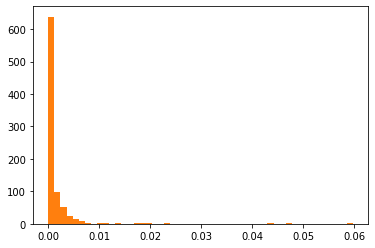

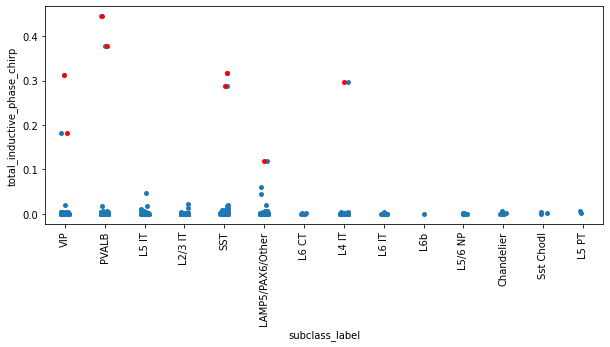

In [70]:
#from scipy.stats import skew

#feat = 'upstroke_downstroke_ratio_short_square'
feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
#feat = 'width_ramp'
#feat = "avg_rate_rheo"

#sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
#print(sk)

(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
plt.hist(df_ephys_sub_no_outliers[feat], bins = bins)

fig,ax = plt.subplots(figsize=(10, 4))
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df3_filt.iloc[list(feat_outliers[feat_ind])], x="subclass_label", y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])
plt.show()

In [24]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer

#target_names = iris.target_names    # unique list of target categories, indexable from the target numbers
#X = df_ephys_sub.iloc[:,:92]     # rows = samples
X = df_ephys_sub_no_outliers.iloc[:,:92]
y_orig = df3_filt['subclass_label']

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y_orig))
print("n samples:", n_samples)
print("n classes:", n_classes)
print("n features:", n_features)

# You have too little data to do train-test validation

label_binarizer = LabelBinarizer().fit(y_orig)
y_onehot = label_binarizer.transform(y_orig)

n samples: 2154
n classes: 14
n features: 92


In [25]:
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X)    # n_samples x n_features

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler = RobustScaler()    # Produces weird results, maybe due to skew?
scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

mean_vec = np.mean(X_std, axis=0)
mean_vec    # Check it's zeroed

array([ 3.82650684e-16, -5.93768303e-16, -1.97922768e-17, -1.55039501e-16,
       -5.93768303e-17, -3.95845535e-17,  3.69455833e-16,  0.00000000e+00,
       -1.05558809e-16, -1.22052373e-16,  7.52106517e-16,  1.45143363e-16,
        3.29871279e-17, -2.11117619e-16,  2.70494449e-16, -1.31948512e-17,
        1.74831778e-16,  2.63897023e-17,  3.95845535e-17, -1.10506879e-16,
        1.58338214e-16,  6.33352856e-16,  2.63897023e-17,  3.69455833e-16,
       -1.41844650e-16,  1.31948512e-17, -1.97922768e-16,  4.88209493e-16,
       -6.06963154e-16, -1.31948512e-17, -5.93768303e-17,  1.45143363e-16,
        3.95845535e-17, -3.29871279e-17, -7.91691070e-17,  5.27794047e-17,
        3.95845535e-17,  4.61819791e-17, -9.89613838e-17, -1.31948512e-16,
       -1.84727916e-16, -3.95845535e-17,  1.84727916e-16,  1.61636927e-16,
        3.95845535e-16, -1.31948512e-16,  7.91691070e-16, -4.61819791e-17,
        0.00000000e+00,  0.00000000e+00, -2.11117619e-16, -7.25716815e-17,
        1.31948512e-17,  

In [27]:
df_ephys_sub['PV'] = y_orig =='PVALB'

In [28]:
def fisher_criterion(v1, v2):      # FOR BINARY PV vs NOT PV
    return (np.mean(v1) - np.mean(v2))**2 / (np.var(v1) + np.var(v2))
fish = []
for feat in df_ephys_sub.columns[:92]:
    feat_ind = df_ephys_sub.columns.get_loc(feat)
    fish.append(fisher_criterion (X_std[:,feat_ind][df_ephys_sub['PV']], X_std[:,feat_ind][~df_ephys_sub['PV']]))

In [35]:
df_ephys_sub.columns.get_loc('downstroke_rheo')
print(np.mean(X_std[:,25][df_ephys_sub['PV']]))
print(np.mean(X_std[:,25][~df_ephys_sub['PV']]))
fisher_criterion (X_std[:,25][df_ephys_sub['PV']], X_std[:,25][~df_ephys_sub['PV']])
sns.stripplot(data=X_std, x='PV', y="ahp_delay_ratio_5spike")

-1.3750505329150193
0.26133557089655624


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `PV` for parameter `x`

In [32]:
d = {'Feature': df_ephys_sub.columns[:92], 'Fisher_cr': fish}
df_PV = pd.DataFrame(d)
df_PV = df_PV.sort_values(by=['Fisher_cr'], ascending=False)

df_PV[0:20]
#df_PV[-10:92]

,Feature,Fisher_cr
26,width_suprathresh_rheo,2.005801
45,width_suprathresh_hero,1.905929
44,downstroke_hero,1.715635
42,width_hero,1.707029
72,upstroke_downstroke_ratio_ramp,1.635028
20,upstroke_downstroke_ratio_rheo,1.617325
77,width_suprathresh_ramp,1.574920
25,downstroke_rheo,1.572828
23,width_rheo,1.563260
81,fast_trough_deltav_ramp,1.528313


In [33]:
# !pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score (X_std, df_ephys_sub['PV'])
#feats = df_ephys_sub.columns[:92]
#print(feats[scores==0])
#print(feats[scores==1])

#d = {'Feature': df_ephys_sub.columns[:92], 'Fisher_cr': fish}
#df_PV = pd.DataFrame(d)
#df_PV = df_PV.sort_values(by=['Fisher_cr'], ascending=False)

#df_PV[0:20]

feat_importances = pd.Series(ranks, df_ephys_sub.columns[:92])
feat_importances = feat_importances.sort_values()
feat_importances


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


3db_freq_chirp                     0
postap_slope_rheo                  1
width_ramp                         2
peak_ratio_chirp                   3
fast_trough_v_hero                 4
                                  ..
width_short_square                87
latency_hero                      88
upstroke_downstroke_ratio_rheo    89
sync_freq_chirp                   90
tau                               91
Length: 92, dtype: int64

In [34]:
df_ephys_sub['PV']

0       False
1       False
2        True
3       False
4       False
        ...  
2149     True
2150     True
2151    False
2152    False
2153    False
Name: PV, Length: 2154, dtype: bool

In [33]:
len(scores)
len(df_ephys_sub[:92].columns)

NameError: name 'scores' is not defined

In [34]:
idx = fisher_score.feature_ranking(score)
idx

AttributeError: module 'skfeature.function.similarity_based.fisher_score' has no attribute 'feature_ranking'

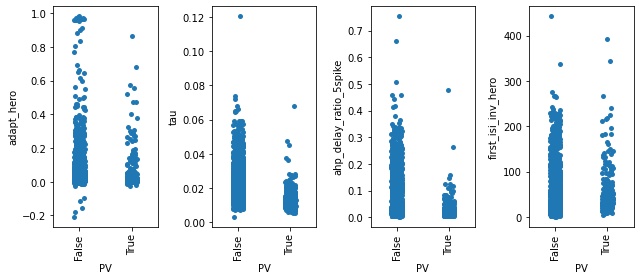

In [38]:
# As sorted by Fisher criterion

fig2, axs = plt.subplots(1, 4, figsize=(9, 4))
plt.axes(axs[0])
#sns.stripplot(data=df_ephys_sub, x='PV', y="width_suprathresh_hero", ax=axs[0])
#sns.stripplot(data=df_ephys_sub, x='PV', y="input_resistance", ax=axs[0])
sns.stripplot(data=df_ephys_sub, x='PV', y="adapt_hero", ax=axs[0])
#plt.title('width_suprathresh_hero')
plt.xticks(rotation = 90)
#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 90)

plt.axes(axs[1])
sns.stripplot(data=df_ephys_sub, x='PV', y="tau", ax=axs[1])
#plt.title('tau')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.stripplot(data=df_ephys_sub, x='PV', y="ahp_delay_ratio_5spike", ax=axs[2])
#plt.title('ahp_delay_ratio_5spike')
plt.xticks(rotation = 90)

plt.axes(axs[3])
#sns.stripplot(data=df_ephys_sub, x='PV', y="upstroke_downstroke_ratio_ramp", ax=axs[3])
sns.stripplot(data=df_ephys_sub, x='PV', y="first_isi_inv_hero", ax=axs[3])
#plt.title('median_isi_hero')
plt.xticks(rotation = 90)

fig2.tight_layout()

#plt.axes(axs[4])
#sns.stripplot(data=df_ephys_sub, x='PV', y="downstroke_adapt_ratio", ax=axs[4])
#plt.title('downstroke_adapt_ratio')
#plt.xticks(rotation = 90)

In [36]:
# ANOVA Eta squared

df_ephys_sub1 = pd.merge(df3_filt[['subclass_label', 'broad_class_label']], df_ephys_sub, left_index=True, right_index=True)

# Subset to only inhibitory neurons
df_ephys_sub_I = df_ephys_sub1[df_ephys_sub1['broad_class_label']== 'GABAergic neuron']

np2_vec = np.empty([2, df_ephys_sub_I.shape[1]-2])

i = 0 
for feat in df_ephys_sub_I.columns[2:-1]:    
    aov = pg.anova(dv=feat, between='subclass_label', data=df_ephys_sub_I,
                detailed=True)
    np2_vec[0,i] = aov.np2[0].round(3)
    np2_vec[1,i] = aov['p-unc'][0]
    i+=1

data_tuples = list(zip(df_ephys_sub_I.columns[2:-1],np2_vec[0,:],np2_vec[1,:]))
df_I = pd.DataFrame(data_tuples)
df_I.columns = ['Feature', 'Partial_eta_squared', 'p-value']

df_I = df_I.sort_values(by='Partial_eta_squared', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_I['p-value']<0.05))
print(min_ind)
df_I

11


,Feature,Partial_eta_squared,p-value
88,sync_freq_chirp,0.002,9.565200e-01
91,total_inductive_phase_chirp,0.003,9.139382e-01
62,peak_v_adapt_ratio,0.003,6.994793e-01
57,isi_adapt_ratio,0.004,4.823270e-01
10,v_baseline,0.005,3.053503e-01
...,...,...,...
25,downstroke_rheo,0.360,5.606531e-107
44,downstroke_hero,0.365,3.486506e-109
20,upstroke_downstroke_ratio_rheo,0.387,1.937070e-117
81,fast_trough_deltav_ramp,0.411,2.797964e-120


In [37]:
# Subset to only excitatory neurons
df_ephys_sub_E = df_ephys_sub1[df_ephys_sub1['broad_class_label']== 'Glutamatergic neuron']

np2_vec = np.empty([2, df_ephys_sub_E.shape[1]-2])

i = 0 
for feat in df_ephys_sub_E.columns[2:-1]:    
    aov = pg.anova(dv=feat, between='subclass_label', data=df_ephys_sub_E,
                detailed=True)
    np2_vec[0,i] = aov.np2[0].round(3)
    np2_vec[1,i] = aov['p-unc'][0]
    i+=1

data_tuples = list(zip(df_ephys_sub_E.columns[2:-1],np2_vec[0,:],np2_vec[1,:]))
df_E = pd.DataFrame(data_tuples)
df_E.columns = ['Feature', 'Partial_eta_squared', 'p-value']

df_E = df_E.sort_values(by='Partial_eta_squared', ascending=True)

min_ind = np.min(np.where(df_E['p-value']<0.05))
print(min_ind)
df_E

8


,Feature,Partial_eta_squared,p-value
91,total_inductive_phase_chirp,0.004,9.822480e-01
88,sync_freq_chirp,0.005,9.519268e-01
74,width_ramp,0.005,7.678983e-01
84,peak_freq_chirp,0.007,8.819326e-01
77,width_suprathresh_ramp,0.008,4.246598e-01
...,...,...,...
14,input_resistance,0.286,6.459167e-64
79,threshold_i_ramp,0.303,2.652651e-64
11,rheobase_i,0.325,5.058564e-75
71,first_isi_inv_hero,0.328,1.302749e-69


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_12699/3148909263.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_12699/3148909263.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, fontsize = 16)


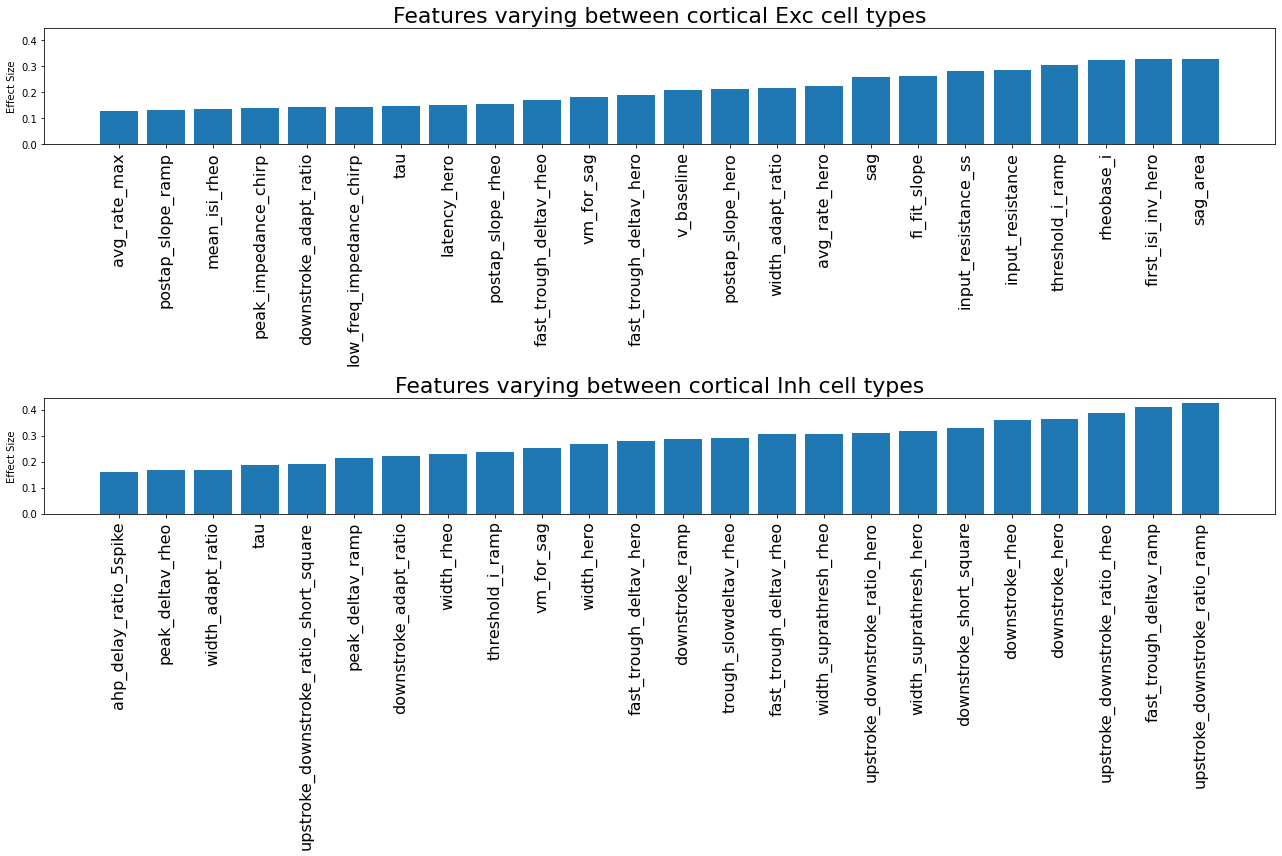

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(18, 12), sharey=True)
axs[0].bar(df_E['Feature'][-24:], df_E['Partial_eta_squared'][-24:])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
axs[0].set_ylabel('Effect Size')
axs[0].set_title('Features varying between cortical Exc cell types', fontsize = 22)

axs[1].bar(df_I['Feature'][-24:], df_I['Partial_eta_squared'][-24:])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, fontsize = 16)
axs[1].set_ylabel('Effect Size')
axs[1].set_title('Features varying between cortical Inh cell types', fontsize = 22)

fig.tight_layout()

In [39]:
feat_names = df_ephys_sub.columns[:92]
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = df_ephys_sub.columns[:92]

In [114]:
# Sparse PCA in R
X_std_df.to_feather('X_std.feather')
# Process then in R elasticnet implementation

In [40]:
df_spca = pd.read_feather('spca_19comps.feather')
sums = df_spca.abs().sum(axis=0)

df_spca = df_spca.drop(df_spca.columns[sums==0],axis = 1)

In [41]:
print(feat_names[np.nonzero(df_spca.iloc[:,0].values)])
comp_names = ['width']

Index(['upstroke_downstroke_ratio_short_square', 'downstroke_short_square',
       'upstroke_downstroke_ratio_rheo', 'width_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'upstroke_downstroke_ratio_hero',
       'width_hero', 'downstroke_hero', 'width_suprathresh_hero',
       'upstroke_downstroke_ratio_ramp', 'width_ramp', 'downstroke_ramp',
       'width_suprathresh_ramp'],
      dtype='object')


In [42]:
print(feat_names[np.nonzero(df_spca.iloc[:,1].values)])
comp_names.append('R_in')

Index(['vm_for_sag', 'input_resistance', 'input_resistance_ss',
       'threshold_i_ramp', 'peak_impedance_chirp', 'low_freq_impedance_chirp'],
      dtype='object')


In [43]:
print(feat_names[np.nonzero(df_spca.iloc[:,2].values)])
comp_names.append('trough_v-threshold_v')

Index(['threshold_v_rheo', 'trough_v_rheo', 'fast_trough_v_rheo',
       'fast_trough_v_last_rheo', 'threshold_v_hero', 'trough_v_hero',
       'fast_trough_v_hero', 'threshold_v_ramp', 'trough_v_ramp'],
      dtype='object')


In [44]:
print(feat_names[np.nonzero(df_spca.iloc[:,3].values)])
comp_names.append('first_isi_inv')

Index(['first_isi_inv_hero'], dtype='object')


In [45]:
print(feat_names[np.nonzero(df_spca.iloc[:,4].values)])
comp_names.append('upstroke')

Index(['upstroke_short_square', 'upstroke_rheo', 'upstroke_hero',
       'upstroke_ramp'],
      dtype='object')


In [46]:
print(feat_names[np.nonzero(df_spca.iloc[:,5].values)])
comp_names.append('adapt')

Index(['upstroke_adapt_ratio', 'threshold_v_adapt_ratio'], dtype='object')


In [47]:
print(feat_names[np.nonzero(df_spca.iloc[:,6].values)])
comp_names.append('sag')

Index(['sag', 'sag_area'], dtype='object')


In [48]:
print(feat_names[np.nonzero(df_spca.iloc[:,7].values)])
comp_names.append('freq_chirp')

Index(['3db_freq_chirp', 'sync_freq_chirp'], dtype='object')


In [49]:
print(feat_names[np.nonzero(df_spca.iloc[:,8].values)])
comp_names.append('fast_trough_deltav')

Index(['fast_trough_deltav_rheo', 'fast_trough_deltav_hero',
       'threshold_v_ramp', 'fast_trough_deltav_ramp'],
      dtype='object')


In [50]:
print(feat_names[np.nonzero(df_spca.iloc[:,9].values)])
comp_names.append('mean_isi')

Index(['mean_isi_hero', 'median_isi_hero'], dtype='object')


In [51]:
print(feat_names[np.nonzero(df_spca.iloc[:,10].values)])
comp_names.append('ir_late_hero')

Index(['ir_late_hero'], dtype='object')


In [52]:
print(feat_names[np.nonzero(df_spca.iloc[:,11].values)])
comp_names.append('postap_slope_ramp')

Index(['postap_slope_ramp'], dtype='object')


In [53]:
print(feat_names[np.nonzero(df_spca.iloc[:,12].values)])
comp_names.append('latency_rheo')

Index(['latency_rheo'], dtype='object')


In [54]:
print(feat_names[np.nonzero(df_spca.iloc[:,13].values)])
comp_names.append('avg_rate_rheo')

Index(['avg_rate_rheo'], dtype='object')


In [55]:
print(feat_names[np.nonzero(df_spca.iloc[:,14].values)])
comp_names.append('ahp_delay_ratio')

Index(['ahp_delay_ratio_hero'], dtype='object')


In [56]:
print(feat_names[np.nonzero(df_spca.iloc[:,15].values)])
comp_names.append('v_m')

Index(['v_baseline', 'vm_for_sag'], dtype='object')


In [57]:
print(feat_names[np.nonzero(df_spca.iloc[:,16].values)])
comp_names.append('sag_tau_depol')

Index(['sag_tau_depol'], dtype='object')


In [58]:
print(feat_names[np.nonzero(df_spca.iloc[:,17].values)])
comp_names.append('phase_peak_chirp')

Index(['phase_peak_chirp'], dtype='object')


In [59]:
print(feat_names[np.nonzero(df_spca.iloc[:,18].values)])
comp_names.append('width_short_square')

Index(['width_short_square', 'width_suprathresh_short_square'], dtype='object')


In [60]:
print(feat_names[np.nonzero(df_spca.iloc[:,19].values)])
comp_names.append('sag_tau')

Index(['sag_tau'], dtype='object')


In [61]:
print(feat_names[np.nonzero(df_spca.iloc[:,20].values)])
comp_names.append('fi_slope')

Index(['fi_fit_slope', 'avg_rate_hero', 'avg_rate_max'], dtype='object')


In [62]:
print(feat_names[np.nonzero(df_spca.iloc[:,21].values)])
comp_names.append('sag_area_depol')

Index(['sag_area_depol'], dtype='object')


In [63]:
print(feat_names[np.nonzero(df_spca.iloc[:,22].values)])
comp_names.append('peak_v')

Index(['peak_deltav_short_square', 'peak_v_rheo', 'peak_v_hero',
       'peak_deltav_rheo', 'peak_deltav_hero', 'peak_deltav_ramp'],
      dtype='object')


In [64]:
print(feat_names[np.nonzero(df_spca.iloc[:,23].values)])
comp_names.append('rheobase_i')

Index(['rheobase_i'], dtype='object')


In [65]:
print(feat_names[np.nonzero(df_spca.iloc[:,24].values)])
comp_names.append('trough_slowdeltav')

Index(['trough_slowdeltav_hero'], dtype='object')


In [66]:
print(feat_names[np.nonzero(df_spca.iloc[:,25].values)])
comp_names.append('tau')

Index(['tau'], dtype='object')


In [67]:
print(feat_names[np.nonzero(df_spca.iloc[:,26].values)])
comp_names.append('adapt_mean')

Index(['adapt_mean'], dtype='object')


In [68]:
print(feat_names[np.nonzero(df_spca.iloc[:,27].values)])
comp_names.append('phase_low_chirp')

Index(['phase_low_chirp'], dtype='object')


In [69]:
print(feat_names[np.nonzero(df_spca.iloc[:,28].values)])
comp_names.append('peak_v_adapt_ratio')

Index(['peak_v_adapt_ratio'], dtype='object')


In [70]:
from scipy.stats import pearsonr
print(feat_names[84])
print(feat_names[4])
corr, pval = pearsonr(X_std[:,84], X_std[:,4])
print(corr)
print(pval)

peak_freq_chirp
downstroke_short_square
-0.19389081289288596
1.0879781713525063e-19


In [71]:
print(feat_names[23])
print(feat_names[42])
corr, pval = pearsonr(X_std[:,23], X_std[:,42])
print(corr)
print(pval)    # Positive control

width_rheo
width_hero
0.9712317598791924
0.0


In [72]:
print(feat_names[84])
print(feat_names[42])
corr, pval = pearsonr(X_std[:,84], X_std[:,42])
print(corr)
print(pval)

peak_freq_chirp
width_hero
-0.1935045971228381
1.2885700758945117e-19


In [73]:
print(feat_names[71])
print(feat_names[81])
corr, pval = pearsonr(X_std[:,71], X_std[:,81])
print(corr)
print(pval)

first_isi_inv_hero
fast_trough_deltav_ramp
0.3102471158898509
2.806579674366158e-49


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'VIP'),
  Text(1, 0, 'PVALB'),
  Text(2, 0, 'L5 IT'),
  Text(3, 0, 'L2/3 IT'),
  Text(4, 0, 'SST'),
  Text(5, 0, 'LAMP5/PAX6/Other'),
  Text(6, 0, 'L6 CT'),
  Text(7, 0, 'L4 IT'),
  Text(8, 0, 'L6 IT'),
  Text(9, 0, 'L6b'),
  Text(10, 0, 'L5/6 NP'),
  Text(11, 0, 'Chandelier'),
  Text(12, 0, 'Sst Chodl'),
  Text(13, 0, 'L5 PT')])

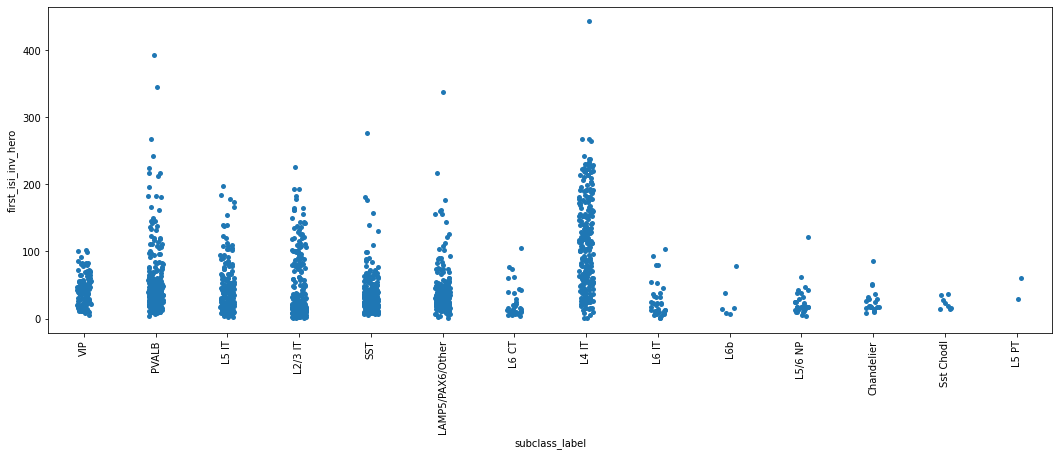

In [74]:
fig,ax = plt.subplots(figsize=(18, 6))
#feat = 'width_suprathresh_rheo'
#feat = 'tau'
feat = 'first_isi_inv_hero'
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'VIP'),
  Text(1, 0, 'PVALB'),
  Text(2, 0, 'L5 IT'),
  Text(3, 0, 'L2/3 IT'),
  Text(4, 0, 'SST'),
  Text(5, 0, 'LAMP5/PAX6/Other'),
  Text(6, 0, 'L6 CT'),
  Text(7, 0, 'L4 IT'),
  Text(8, 0, 'L6 IT'),
  Text(9, 0, 'L6b'),
  Text(10, 0, 'L5/6 NP'),
  Text(11, 0, 'Chandelier'),
  Text(12, 0, 'Sst Chodl'),
  Text(13, 0, 'L5 PT')])

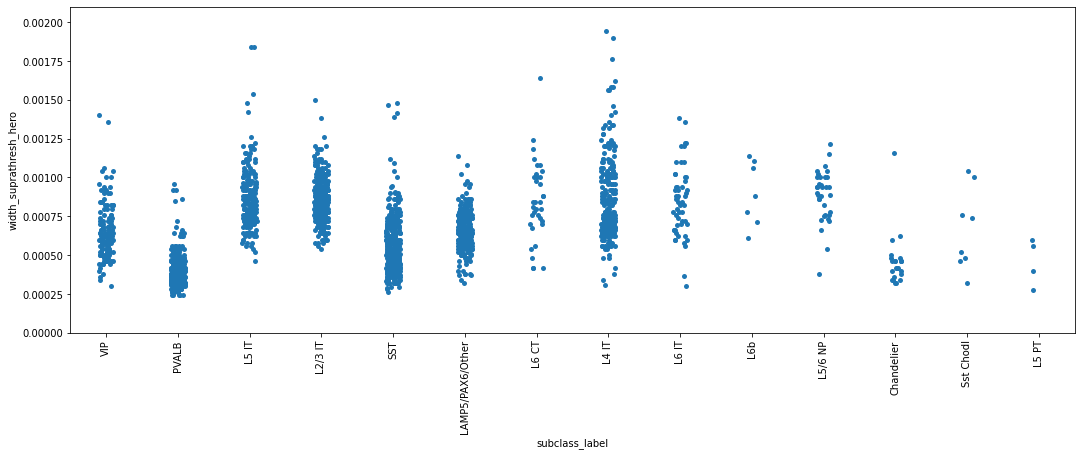

In [75]:
fig,ax = plt.subplots(figsize=(18, 6))
feat = 'width_suprathresh_hero'
#feat = 'tau'
#feat = 'sag'
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.ylim([0, 0.0021])
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'VIP'),
  Text(1, 0, 'PVALB'),
  Text(2, 0, 'L5 IT'),
  Text(3, 0, 'L2/3 IT'),
  Text(4, 0, 'SST'),
  Text(5, 0, 'LAMP5/PAX6/Other'),
  Text(6, 0, 'L6 CT'),
  Text(7, 0, 'L4 IT'),
  Text(8, 0, 'L6 IT'),
  Text(9, 0, 'L6b'),
  Text(10, 0, 'L5/6 NP'),
  Text(11, 0, 'Chandelier'),
  Text(12, 0, 'Sst Chodl'),
  Text(13, 0, 'L5 PT')])

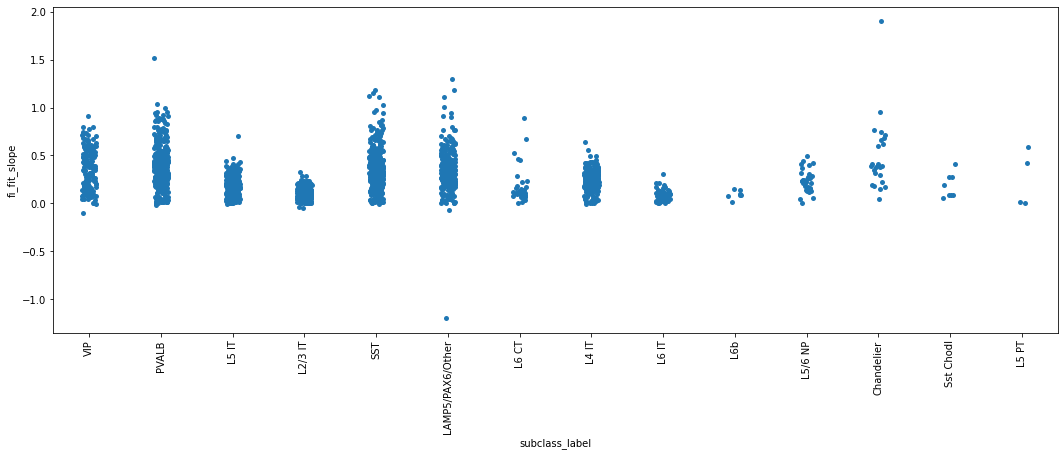

In [76]:
fig,ax = plt.subplots(figsize=(18, 6))
#feat = 'width_suprathresh_rheo'
#feat = 'tau'
feat = 'fi_fit_slope'
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.xticks(rotation = 90)

In [77]:
X_transformed = X_std @ df_spca.values
X = X_transformed

fish_ovo = []
#for col in ary.T:
for col in range(X_transformed.shape[1]):
    vals = []
    for pop1 in np.unique(y_orig):
        for pop2 in np.unique(y_orig):
            if pop1 == pop2:
                continue
            elif (np.sum(y_orig==pop1)<3) or (np.sum(y_orig==pop2)<3):
                continue
            else:
                #print(f'{pop1} vs. {pop2}')
                vals.append(fisher_criterion (X_transformed[y_orig==pop1,col], X_transformed[y_orig==pop2,col]))
    
    fish_ovo.append(vals)
len(fish_ovo)

useful = []
i = 0
for feat in comp_names:
    if np.sum(np.array(fish_ovo[i])>1):      # TRY RAISING THIS THRESHOLD - was 2 or 1
        useful.append(True)
        print(feat)
    else:
        useful.append(False)
    i+=1

print(sum(useful))  # Number of components
    
X_transformed_useful = X_std @ df_spca.values[:,useful]

width
R_in
trough_v-threshold_v
first_isi_inv
upstroke
adapt
sag
freq_chirp
fast_trough_deltav
mean_isi
ir_late_hero
postap_slope_ramp
latency_rheo
ahp_delay_ratio
v_m
width_short_square
fi_slope
peak_v
rheobase_i
tau
adapt_mean
21


In [78]:
df_spca.values.shape     # Full number sPCs from elasticnet

(92, 29)

In [79]:
scores = fisher_score.fisher_score (X_transformed, y_orig)
scores

#comp_names[scores.astype(int)]

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


array([28, 20,  6, 27, 22, 19,  5,  8, 25,  3, 10, 14, 13,  1,  2, 18, 17,
       26,  0, 23, 16,  4, 21, 24, 15,  7, 11,  9, 12])

In [80]:
np.argwhere(scores < 5).flatten()
#comp_names[[9,13,14,18,21]]
print(comp_names[9])
print(comp_names[13])
print(comp_names[14])
print(comp_names[18])
print(comp_names[21])


mean_isi
avg_rate_rheo
ahp_delay_ratio
width_short_square
sag_area_depol


In [81]:
np.mean(X_transformed[y_orig != 'PVALB', 0])

0.7556506471802291

In [82]:
fisher_criterion (X_transformed[y_orig=='PVALB',0], X_transformed[y_orig=='L5 IT',0])

5.535649516173702

In [100]:
# Remove subclasses with less than 10 cells - causes problems for crossvalidation scores further down and noisy
# Currently rmoves L5 PT, L6b, and SST Chodl

cts = y_orig.value_counts()
insuff_subclasses = cts.index[cts<10]
notinsuff_inds = [s not in insuff_subclasses for s in y_orig]
y_suff = y_orig[notinsuff_inds]
X_suff = X_std[notinsuff_inds,:]
X_transformed_suff = X_transformed[notinsuff_inds,:]

['width', 'R_in', 'trough_v-threshold_v', 'first_isi_inv', 'upstroke', 'adapt', 'sag', 'freq_chirp', 'fast_trough_deltav', 'mean_isi', 'ir_late_hero', 'postap_slope_ramp', 'latency_rheo', 'avg_rate_rheo', 'ahp_delay_ratio', 'v_m', 'sag_tau_depol', 'phase_peak_chirp', 'width_short_square', 'sag_tau', 'fi_slope', 'sag_area_depol', 'peak_v', 'rheobase_i', 'trough_slowdeltav', 'tau', 'adapt_mean', 'phase_low_chirp', 'peak_v_adapt_ratio']
Test 0.41720930232558145
Train 0.43209302325581395
Test 0.472093023255814
Train 0.4959302325581395
Test 0.49255813953488375
Train 0.5429069767441861
Test 0.5120930232558141
Train 0.6072093023255815
Test 0.5451162790697675
Train 0.673953488372093
Test 0.5451162790697675
Train 0.7308139534883721
Test 0.5376744186046511
Train 0.7880232558139534
Test 0.5404651162790698
Train 0.8396511627906976
Test 0.5283720930232558
Train 0.8820930232558138
Test 0.5176744186046511
Train 0.9808139534883722
Test 0.5195348837209302
Train 0.9884883720930233


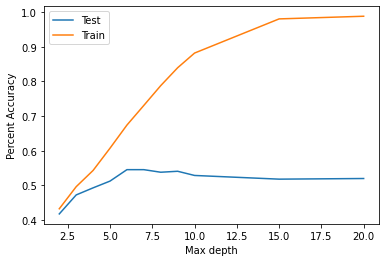

Best: 6


,0
0.979592,Chandelier
0.995608,L2/3 IT
0.996183,L4 IT
0.995215,L5 IT
0.985507,L5/6 NP
0.985915,L6 CT
1.000000,L6 IT
1.000000,L6b
0.993548,LAMP5/PAX6/Other
0.963585,PVALB


In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

#X_transformed = X_std @ df_spca.values
#X = X_transformed
#X = X_std
X = np.array(X_suff)
y = np.array(y_suff)

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

max_depth_list = [2,3,4,5,6,7,8,9,10,15,20]
perc_corr_test_md = []
perc_corr_train_md = []

for md in max_depth_list:
    perc_corr_test = []
    perc_corr_train = []

    for train_index, test_index in kf.split(X, y):
        # Create classifer object
        clf2 = DecisionTreeClassifier(max_depth=md)

        # Train classifer
        clf2 = clf2.fit(X[train_index],y[train_index])

        #Predict the response for test dataset
        y_pred = clf2.predict(X[test_index])
        y_pred_train = clf2.predict(X[train_index])

        perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
        perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))

    print("Test", np.mean(perc_corr_test))
    print("Train", np.mean(perc_corr_train))
    perc_corr_test_md.append(np.mean(perc_corr_test))
    perc_corr_train_md.append(np.mean(perc_corr_train))

plt.plot(max_depth_list, perc_corr_test_md)
plt.plot(max_depth_list, perc_corr_train_md)
plt.xlabel("Max depth")
plt.ylabel("Percent Accuracy")
plt.legend(["Test", "Train"])
plt.show()
print("Best:", max_depth_list[np.argmax(perc_corr_test_md)])

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X,y)
y_pred = clf2.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf2.classes_,f1)
df_f1

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2,3,4,5,6,7,8,9,10,15],
#    "max_depth": [6],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=1)
grid_cv = GridSearchCV(clf, param_grid, scoring = "f1_macro", n_jobs=-1, cv=5, error_score="raise")
grid_cv.fit(X, y)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
 

Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.3209594393729869


['Chandelier' 'L2/3 IT' 'L4 IT' 'L5 IT' 'L5 PT' 'L5/6 NP' 'L6 CT' 'L6 IT'
 'L6b' 'LAMP5/PAX6/Other' 'PVALB' 'SST' 'Sst Chodl' 'VIP']


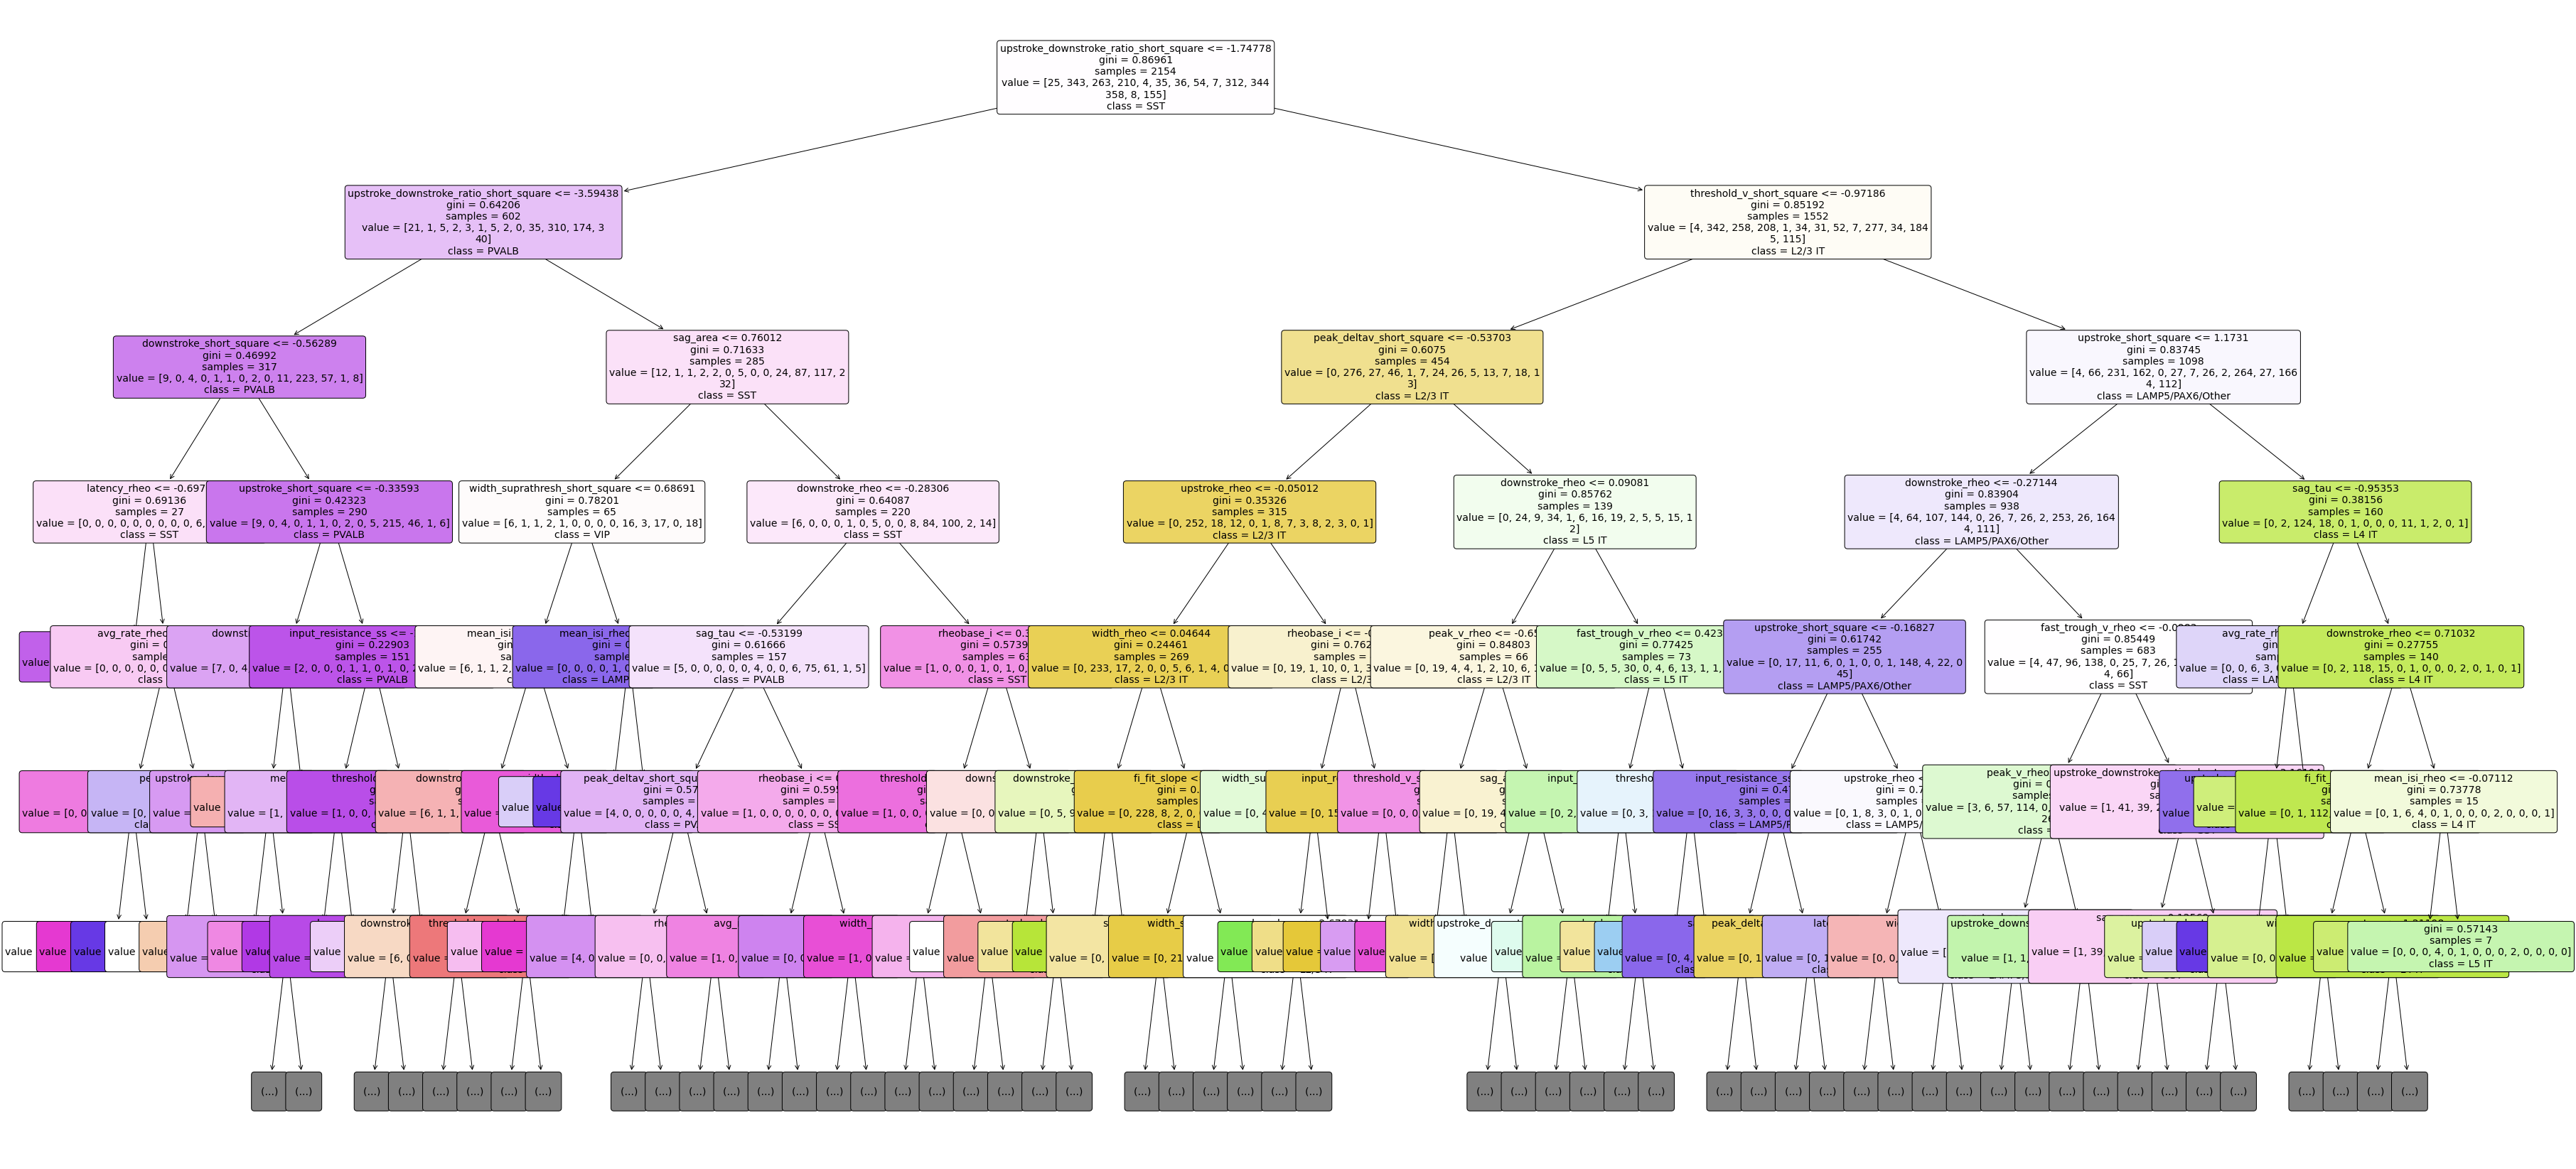

In [213]:
fig = plt.figure(figsize=(60,30))
clf2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf = 5, min_samples_split = 2).fit(X,y)
feature_cols = imputer.feature_names_in_
class_names = clf2.classes_

_ = plot_tree(clf2, 
                   feature_names=feature_cols,
                   max_depth = 6,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)

fig.savefig("decision_tree.png", dpi=300)
print(class_names)

['width', 'R_in', 'trough_v', 'first_isi_inv', 'upstroke', 'adapt', 'sag', 'freq_chirp', 'fast_trough_deltav', 'mean_isi', 'ir_late_hero', 'postap_slope_ramp', 'latency_rheo', 'avg_rate_rheo', 'ahp_delay_ratio', 'v_m', 'sag_tau_depol', 'phase_peak_chirp', 'width_short_square', 'sag_tau', 'fi_slope', 'sag_area_depol', 'peak_v', 'rheobase_i', 'trough_slowdeltav', 'tau', 'adapt_mean', 'phase_low_chirp', 'peak_v_adapt_ratio']
Test 0.39508228565261966
Train 0.4069173310997788
F1-macro:  0.15438037394226517
Test 0.4442853288728214
Train 0.4677340687545195
F1-macro:  0.21022716151897852
Test 0.469831112070361
Train 0.5184538918656151
F1-macro:  0.23949255256706858
Test 0.5134570765661254
Train 0.5869328304244606
F1-macro:  0.2689586900905375
Test 0.5264727782873793
Train 0.6428721958813003
F1-macro:  0.2966992682082403
Test 0.5380737063616252
Train 0.7056631785330987
F1-macro:  0.315063027842293
Test 0.540860087411644
Train 0.7636965014078665
F1-macro:  0.31947959537665344
Test 0.528321372686

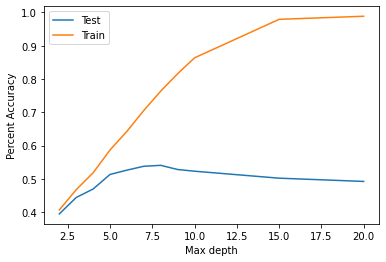

Best: 8


,0
0.979592,Chandelier
0.995608,L2/3 IT
0.996183,L4 IT
0.995215,L5 IT
1.000000,L5 PT
0.985507,L5/6 NP
0.985915,L6 CT
1.000000,L6 IT
1.000000,L6b
0.993548,LAMP5/PAX6/Other


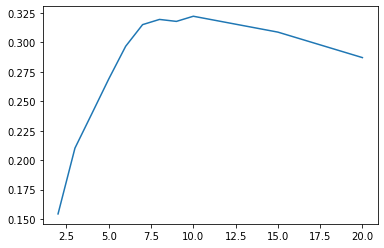

In [359]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

X_transformed = X_std @ df_spca.values
X = X_transformed

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

max_depth_list = [2,3,4,5,6,7,8,9,10,15,20]
perc_corr_test_md = []
perc_corr_train_md = []
f1_all = []

for md in max_depth_list:
    perc_corr_test = []
    perc_corr_train = []
    f1_list = []

    for train_index, test_index in kf.split(X, y):
        # Create classifer object
        clf2 = DecisionTreeClassifier(max_depth=md)

        # Train classifer
        clf2 = clf2.fit(X[train_index],y[train_index])

        #Predict the response for test dataset
        y_pred = clf2.predict(X[test_index])
        y_pred_train = clf2.predict(X[train_index])

        perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
        perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))
        f1 = f1_score(y[test_index], y_pred, average="macro")
        f1_list.append(f1)

    print("Test", np.mean(perc_corr_test))
    print("Train", np.mean(perc_corr_train))
    print("F1-macro: ", np.mean(f1_list))
    perc_corr_test_md.append(np.mean(perc_corr_test))
    perc_corr_train_md.append(np.mean(perc_corr_train))
    f1_all.append(np.mean(f1_list))

plt.plot(max_depth_list, perc_corr_test_md)
plt.plot(max_depth_list, perc_corr_train_md)
plt.xlabel("Max depth")
plt.ylabel("Percent Accuracy")
plt.legend(["Test", "Train"])
plt.show()
print("Best:", max_depth_list[np.argmax(perc_corr_test_md)])

plt.plot(max_depth_list, f1_all)

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X,y)
y_pred = clf2.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf2.classes_,f1)
df_f1

In [360]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2,3,4,5,6,7,8,9,10,15],
#    "max_depth": [8],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=1)
grid_cv = GridSearchCV(clf, param_grid, scoring = "f1_macro", n_jobs=-1, cv=5, error_score="raise")
grid_cv.fit(X, y)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
 

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Param for GS {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.2992447674884711


['Chandelier' 'L2/3 IT' 'L4 IT' 'L5 IT' 'L5 PT' 'L5/6 NP' 'L6 CT' 'L6 IT'
 'L6b' 'LAMP5/PAX6/Other' 'PVALB' 'SST' 'Sst Chodl' 'VIP']


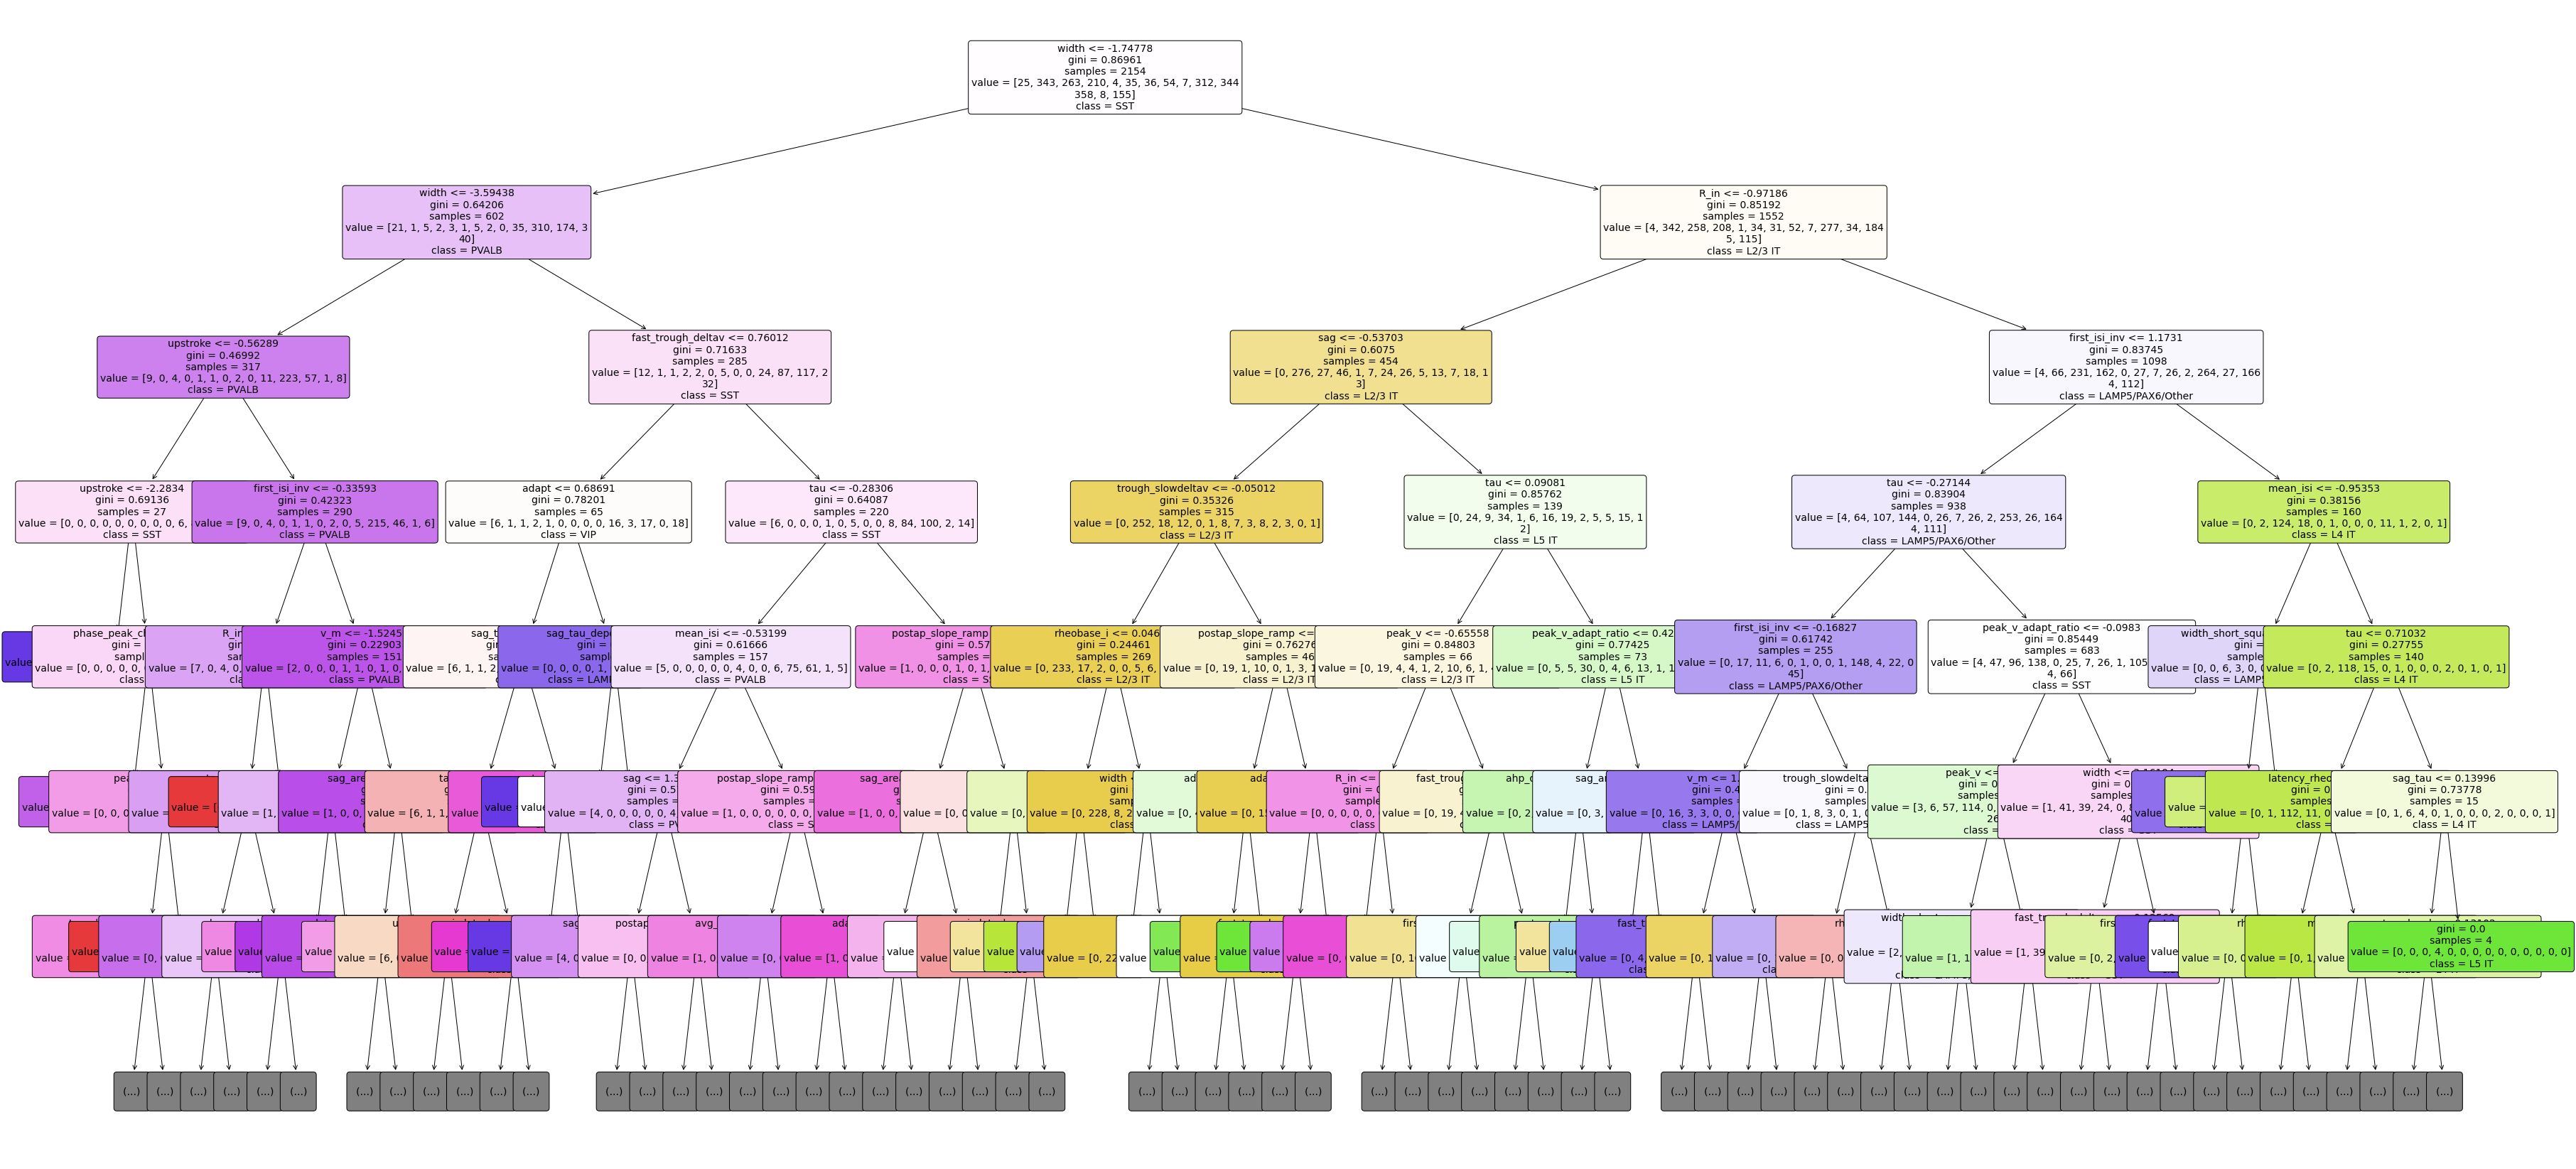

In [361]:
fig = plt.figure(figsize=(60,30))
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_leaf = 1, min_samples_split = 10).fit(X,y)
class_names = clf2.classes_

_ = plot_tree(clf2, 
                   feature_names=comp_names,
                   max_depth = 6,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)

fig.savefig("decision_tree_spca.png", dpi=300)
print(class_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.469) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.450) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=0.514) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] END ................................ score: (test=0.481) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] END ................................ score: (test=0.446) total time=   0.5s
0.47202708509764085 0.02454772822114515


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


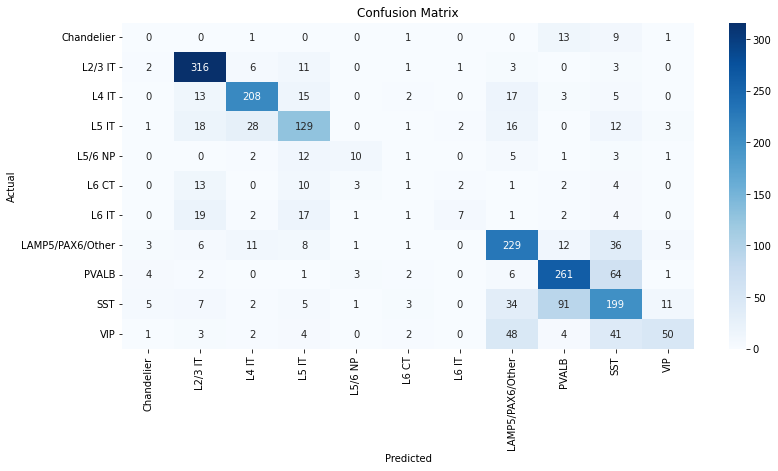

In [129]:
# From: https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874
from sklearn.model_selection import KFold, cross_val_score
from typing import Tuple
import copy as cp
from sklearn.metrics import confusion_matrix

subclasses = list(np.unique(y))

#X = X_transformed
X = np.array(X_transformed_suff)
#X = X_transformed_useful
#X = X_std
y = np.array(y_suff)

model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')  # Balanced subsample seemed to improve L5/6NP
#model = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

#cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring='balanced_accuracy', verbose=10)   # of f1 or r2

print(cv_results.mean(), cv_results.std())

def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()
    
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X, y)
plot_confusion_matrix(actual_classes, predicted_classes, subclasses)

In [181]:
from sklearn.metrics import classification_report
print(classification_report(actual_classes, predicted_classes))

                  precision    recall  f1-score   support

      Chandelier       0.00      0.00      0.00        25
         L2/3 IT       0.78      0.94      0.85       343
           L4 IT       0.79      0.79      0.79       263
           L5 IT       0.64      0.60      0.62       210
           L5 PT       0.00      0.00      0.00         4
         L5/6 NP       0.91      0.29      0.43        35
           L6 CT       0.18      0.06      0.09        36
           L6 IT       0.55      0.11      0.18        54
             L6b       0.00      0.00      0.00         7
LAMP5/PAX6/Other       0.63      0.72      0.67       312
           PVALB       0.64      0.78      0.70       344
             SST       0.53      0.55      0.54       358
       Sst Chodl       0.00      0.00      0.00         8
             VIP       0.78      0.34      0.47       155

        accuracy                           0.66      2154
       macro avg       0.46      0.37      0.38      2154
    weighted

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [200]:
accuracy = sum(actual_classes == predicted_classes)/len(actual_classes)
accuracy

0.6578458681522749

In [186]:
clf = model.fit(X, y)

importance = clf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    feat_name = feature_cols[i]
#    print('Feature: %s, Score: %.5f' % (feat_name,v))
    
d = {'Feature': comp_names, 'Feature_importance': importance}
#d = {'Feature': feature_cols, 'Feature_importance': importance}
df_dec_impo = pd.DataFrame(d)
df_dec_impo = df_dec_impo.sort_values(by=['Feature_importance'], ascending=False)
df_dec_impo.head(15)


,Feature,Feature_importance
0,width,0.057845
18,width_short_square,0.049894
1,R_in,0.048443
25,tau,0.048032
8,fast_trough_deltav,0.044848
6,sag,0.044478
20,fi_slope,0.042023
3,first_isi_inv,0.041501
15,v_m,0.036790
9,mean_isi,0.036748


In [185]:
# Chandelier versus Pvalb logistic regression?

from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)


X_sub = np.array(X_transformed[np.array(y_orig=='PVALB') | np.array(y_orig=='Chandelier')])
y_sub = np.array(y_orig[np.array(y_orig=='PVALB') | np.array(y_orig=='Chandelier')])

for train_index, test_index in kf.split(X_sub, y_sub):

    print(len(train_index))
    clf = LogisticRegression(solver="lbfgs", max_iter=1000, class_weight = 'balanced').fit(X_sub[train_index], y_sub[train_index])
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_sub[test_index])
    
    perc_corr.append(sum(y_pred==y_sub[test_index])/len(y_sub[test_index]))

print(np.mean(perc_corr))

295
295
295
295
296
0.8291743798593114


In [231]:
# Look at coeffs - what are the distinguishing features?

# nclasses x nfeatures
df_I = pd.DataFrame(clf.coef_, columns=comp_names)
#df_I = pd.DataFrame(clf.coef_, columns=comp_names, index = clf.classes_)

featsigns = df_I
featsigns[abs(featsigns)<0.5] = np.nan    # Threshold was 0.1
featsigns.dropna(inplace=True, axis = 1)

print(featsigns.round(decimals=2))
top_PVorCh = list(featsigns.columns)

   width  upstroke  freq_chirp  fast_trough_deltav  ahp_delay_ratio  \
0   1.12      0.98        1.15                1.43             0.89   

   trough_slowdeltav   tau  phase_low_chirp  
0               1.45 -1.23            -1.01  


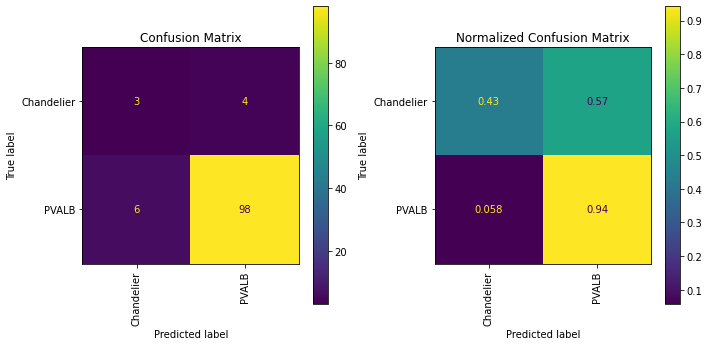

In [278]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=42)
clf = LogisticRegression(solver="lbfgs", max_iter=1000, class_weight = 'balanced').fit(X_train, y_train)
clf = LogisticRegression(solver="lbfgs", max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].set_title('Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, ax = ax[1], normalize='true')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

fig.tight_layout()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_12699/4051998811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ephys_sub['PVorCh'][y_orig=='PVALB'] = True


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

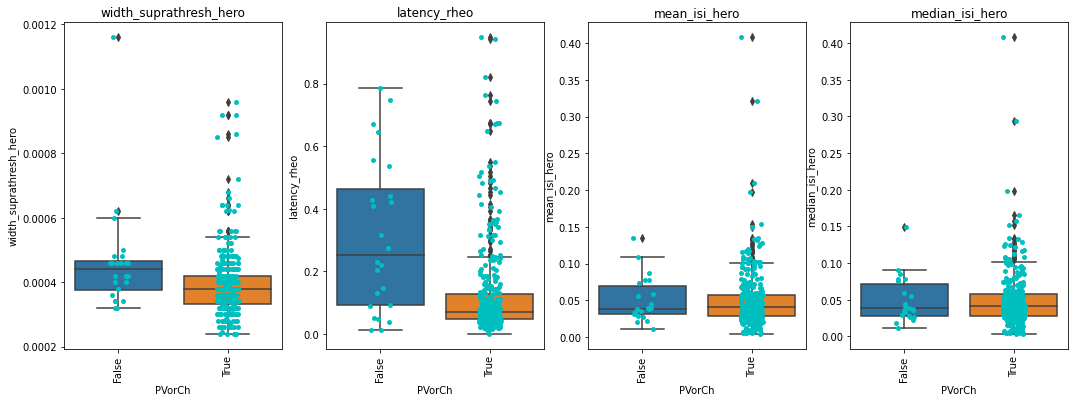

In [158]:
df_ephys_sub['PVorCh'] = np.nan
df_ephys_sub['PVorCh'][y_orig=='PVALB'] = True
df_ephys_sub['PVorCh'][y_orig=='Chandelier'] = False

fig2, axs = plt.subplots(1, 4, figsize=(18, 6))
plt.axes(axs[0])
sns.boxplot(x='PVorCh', y='width_suprathresh_hero', data=df_ephys_sub, ax=axs[0], orient = 'v')
sns.stripplot(data=df_ephys_sub, x='PVorCh', y="width_suprathresh_hero", ax=axs[0], color = 'c')
#sns.violinplot(x='PVorCh', y='width_suprathresh_hero', data=df_ephys_sub, ax=axs[0])
#g = sns.catplot(x="PVorCh", y="width_suprathresh_hero",
#                data=df_ephys_sub, kind="box",
#                palette=["#FFA7A0", "#ABEAC9"],
#                height=4, aspect=.7, ax=axs[0])
#g.map_dataframe(sns.stripplot, x='PVorCh', y="width_suprathresh_hero", 
#                palette=["#404040"], 
#                alpha=0.6, dodge=True)
plt.title('width_suprathresh_hero')
plt.xticks(rotation = 90)
#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 90)

plt.axes(axs[1])
sns.boxplot(x='PVorCh', y='latency_rheo', data=df_ephys_sub, ax=axs[1], orient = 'v')
sns.stripplot(data=df_ephys_sub, x='PVorCh', y="latency_rheo", ax=axs[1], color = 'c')
plt.title('latency_rheo')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.boxplot(x='PVorCh', y='mean_isi_hero', data=df_ephys_sub, ax=axs[2], orient = 'v')
sns.stripplot(data=df_ephys_sub, x='PVorCh', y="mean_isi_hero", ax=axs[2], color = 'c')
plt.title('mean_isi_hero')
plt.xticks(rotation = 90)

plt.axes(axs[3])
sns.boxplot(x='PVorCh', y='median_isi_hero', data=df_ephys_sub, ax=axs[3], orient = 'v')
sns.stripplot(data=df_ephys_sub, x='PVorCh', y="median_isi_hero", ax=axs[3], color = 'c')
plt.title('median_isi_hero')
plt.xticks(rotation = 90)

# Note that regression can show a mean difference - make boxplots, but there could still be lots of overlap

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_12699/2293440427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_trans['PVorCh'] = df_ephys_sub['PVorCh']


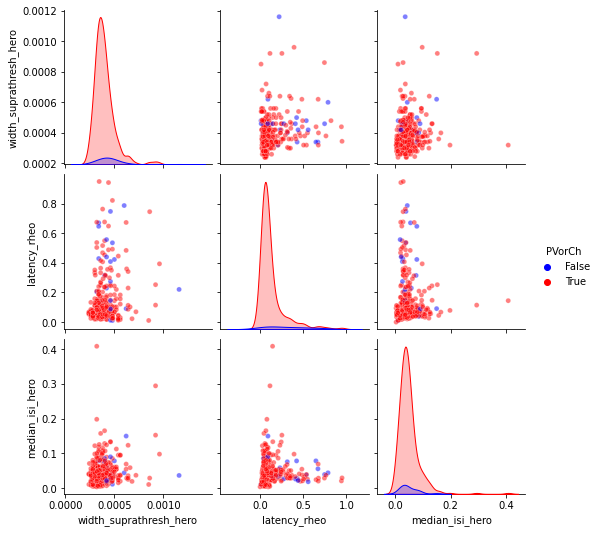

In [232]:
#sns.pairplot(penguins.drop("year", axis=1), hue='species')

# Use X_transformed
#df_X_trans = pd.DataFrame(X_transformed, columns=comp_names)
#df_X_trans = df_X_trans[top_PVorCh]
# Use some raw features
df_X_trans = df_ephys_sub[['width_suprathresh_hero', 'latency_rheo', 'median_isi_hero']]
df_X_trans['PVorCh'] = df_ephys_sub['PVorCh']

# Create an index for high confidence

sns.pairplot(df_X_trans[:-1], hue='PVorCh', palette = {True:'r', False:'b'}, plot_kws={"s": 25, "alpha": 0.5})

#plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
#plot_kws={"s": 5, 

# Outlier cells clear on this - revisit QC on the data?

(369, 2)


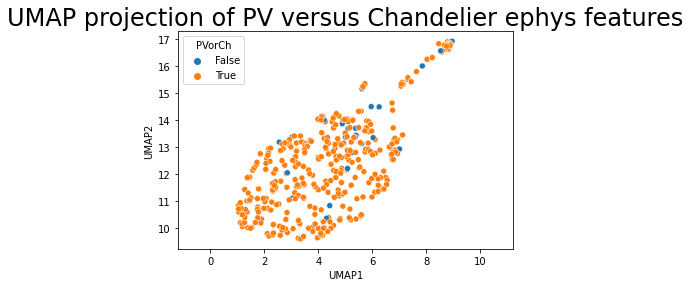

In [258]:
import umap
import math

reducer = umap.UMAP()

#df_PV_Ch = df_ephys_sub.dropna(subset = ['PVorCh'])
#scaled_data = X_std[]

scaled_data = X_std[~pd.isna(df_ephys_sub['PVorCh']),:]
scaled_data = pd.DataFrame(X_std)
scaled_data['PVorCh'] = df_ephys_sub['PVorCh']
scaled_data = scaled_data.dropna(subset = ['PVorCh']).reset_index(drop=True)

embedding = reducer.fit_transform(scaled_data.iloc[:,:-1])
print(embedding.shape)
df_embed = pd.DataFrame(embedding, columns = ['UMAP1', 'UMAP2'])
#df_embed['PVorCh'] = df_ephys_sub['PVorCh'].dropna().reset_index(drop=True)
df_embed['PVorCh'] = scaled_data['PVorCh']

#plt.scatter(
#    embedding[:, 0],
#    embedding[:, 1])
#    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
sns.scatterplot(df_embed, x = 'UMAP1', y = 'UMAP2', hue = 'PVorCh')
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of PV versus Chandelier ephys features', fontsize=24);

In [ ]:
# Try using PC's specifically for PV vs Chand 

In [ ]:
# Followed by PLS regression
# Partial Least Squares

from sklearn.cross_decomposition import PLSRegression

y_temp = y_Exc
label_binarizer = LabelBinarizer().fit(y_temp)
y_onehot = label_binarizer.transform(y_temp)
#print(y_onehot.shape)  # (n_samples, n_classes)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []

#X = X_std
X_Exc = X_std[Exc_inds,:]
X = X_Exc
print(X_Exc.shape)
for train_index, test_index in kf.split(X, y_onehot):

    pls = PLSRegression(n_components=17)
    pls.fit(X[train_index,:], y_onehot[train_index,:])
    #y_pred = pls.predict(X[test_index])
    #print(y_pred[0,:])
    #y_pred = np.argmax(y_pred, axis=1)    # These results are particularly high valued for particular component columns
    X_t_train = pls.transform(X[train_index,:])
    X_t = pls.transform(X[test_index,:])
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_t_train, y_temp[train_index])
    y_pred = clf.predict(X_t)    
    perc_corr.append(sum(y_pred==y_temp[test_index])/len(test_index))

print(np.mean(perc_corr))

In [247]:
scaled_data.shape

(369, 92)

In [248]:
embedding.shape

(369, 2)

0.6121779859484777
0.5019592458924342
0.8916029914557345
0.6131147540983607
0.5045073788888625
0.8918367204759715
0.6121779859484777
0.5020822622096233
0.8924734997839178
0.6126463700234192
0.5021347193897018
0.8925312971181558
0.6131147540983607
0.5014934970562475
0.8927443133051828
0.6140515222482437
0.5017413524151679
0.8930915088750606
0.614519906323185
0.5010817702582934
0.8935208990173276
0.6145199063231851
0.501221526105104
0.8935857436191499
0.6126463700234193
0.4989166629590008
0.8936518437127245
0.6121779859484777
0.49825024047231725
0.8937108005112016
0.6121779859484777
0.4980823130043781
0.8936665780236093
0.6084309133489462
0.4901636497107
0.8937380270949685
0.6117096018735364
0.48749711418703506
0.8932750948609574
0.6084309133489461
0.4841283815743799
0.8916307748989796
0.6098360655737706
0.4846715513441354
0.8913417296637156
0.6042154566744731
0.4664959325030857
0.8900056679410417
0.5831381733021077
0.43104866234023975
0.8866448963745299
0.5045073788888625


0.3

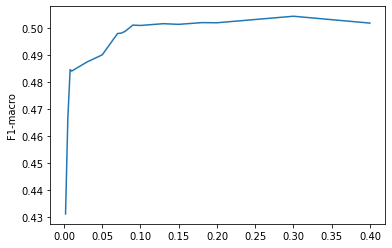

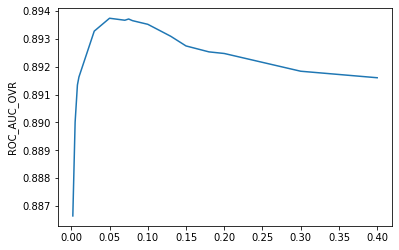

In [124]:
# Multinomial logistic regression with sPC's

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

kf =KFold(n_splits=5, shuffle=True, random_state=1)

#X = X_transformed
X = np.array(X_transformed_suff)
#X = X_std
#X = X_Exc
#y_Exc = y[Exc_inds]
#y_Exc.index = y.index[:len(y_Exc)]
y = np.array(y_suff)
#C_list = [5.0, 3.0, 1.0, 0.8, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05]
C_list = [0.4, 0.3, 0.2, 0.18, 0.15, 0.13, 0.1, 0.09, 0.08, 0.075, 0.07, 0.05, 0.03, 0.01, 0.008, 0.005, 0.002]
perc_corr_all = []
f1_all = []
roc_auc_ovr = []

for c in C_list:
    perc_corr = []
    f1_list = []
    roc_list = []
    for train_index, test_index in kf.split(X, y):
        #clf_lr = LogisticRegression(solver="saga", multi_class='ovr', penalty = "elasticnet", l1_ratio = 0.5, max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #clf_lr = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=100000, C=c, class_weight = 'balanced').fit(X[train_index], y[train_index])
        #Predict the response for test dataset
        y_pred = clf_lr.predict(X[test_index])
        f1 = f1_score(y[test_index], y_pred, average="macro")
        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
        f1_list.append(f1)
        roc = roc_auc_score(y[test_index], clf_lr.predict_proba(X[test_index]), average="macro", multi_class = 'ovr')
        roc_list.append(roc)
    print(np.mean(perc_corr))
    print(np.mean(f1_list))
    print(np.mean(roc_list))
    perc_corr_all.append(np.mean(perc_corr))
    f1_all.append(np.mean(f1_list))
    roc_auc_ovr.append(np.mean(roc_list))
#plt.plot(C_list, perc_corr_all)
plt.plot(C_list, f1_all)
plt.ylabel('F1-macro')

plt.figure()
plt.plot(C_list, roc_auc_ovr)
plt.ylabel('ROC_AUC_OVR')

print(max(f1_all))
C_list[np.argmax(f1_all)]

In [109]:
set(np.unique(y)).difference(np.unique(y[test_index]))

set()

In [183]:
clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=10000, C=0.06).fit(X[train_index,], y[train_index])

# nclasses x nfeatures
df_I = pd.DataFrame(clf_lr.coef_, columns=comp_names, index = clf_lr.classes_)

df_I

for cl in clf_lr.classes_:
    featsigns = df_I.loc[cl]
    featsigns[abs(featsigns)<0.15] = np.nan    # Threshold was 0.1
    featsigns.dropna(inplace=True)
    print(f"{cl}:{featsigns.round(decimals=2)}")

Chandelier:width                  -0.48
R_in                   -0.25
trough_v-threshold_v    0.15
first_isi_inv          -0.36
upstroke               -0.32
freq_chirp             -0.24
latency_rheo            0.36
ahp_delay_ratio        -0.17
fi_slope               -0.23
trough_slowdeltav      -0.21
tau                     0.19
peak_v_adapt_ratio     -0.26
Name: Chandelier, dtype: float64
L2/3 IT:R_in                 -0.37
first_isi_inv        -0.41
upstroke             -0.37
sag                  -0.53
fast_trough_deltav   -0.25
ir_late_hero         -0.21
postap_slope_ramp     0.29
v_m                   0.31
sag_area_depol       -0.20
peak_v                0.48
rheobase_i            0.34
trough_slowdeltav    -0.15
tau                  -0.18
Name: L2/3 IT, dtype: float64
L4 IT:width                   0.26
R_in                    0.20
trough_v-threshold_v    0.24
first_isi_inv           0.83
upstroke                0.22
adapt                   0.43
v_m                     0.16
fi_slope  

In [126]:
from sklearn.metrics import classification_report
clf_lr = LogisticRegression(solver="liblinear", multi_class='ovr', penalty = "l2", class_weight = 'balanced', max_iter=10000, C=0.3).fit(X[train_index,], y[train_index])

print(classification_report(y, clf_lr.predict(X)))

                  precision    recall  f1-score   support

      Chandelier       0.25      0.60      0.35        25
         L2/3 IT       0.83      0.87      0.85       343
           L4 IT       0.73      0.74      0.74       263
           L5 IT       0.64      0.56      0.60       210
         L5/6 NP       0.44      0.80      0.57        35
           L6 CT       0.17      0.19      0.18        36
           L6 IT       0.37      0.54      0.44        54
LAMP5/PAX6/Other       0.75      0.61      0.67       312
           PVALB       0.69      0.75      0.72       344
             SST       0.57      0.48      0.52       358
             VIP       0.52      0.52      0.52       155

        accuracy                           0.65      2135
       macro avg       0.54      0.61      0.56      2135
    weighted avg       0.66      0.65      0.65      2135



In [135]:
from logitboost import LogitBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_size = 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, stratify=y, random_state=0)

lboost = LogitBoost(n_estimators=200, random_state=0)
lboost.fit(X_train, y_train)

y_pred_train = lboost.predict(X_train)
y_pred_test = lboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Training accuracy: %.4f' % accuracy_train)
print('Test accuracy:     %.4f' % accuracy_test)

report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)
print('Training\n%s' % report_train)
print('Test\n%s' % report_test)

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Training accuracy: 0.9599
Test accuracy:     0.5997
Training
                  precision    recall  f1-score   support

      Chandelier       1.00      0.65      0.79        17
         L2/3 IT       0.99      0.99      0.99       229
           L4 IT       1.00      0.98      0.99       175
           L5 IT       0.99      0.94      0.97       140
         L5/6 NP       1.00      0.83      0.90        23
           L6 CT       1.00      0.92      0.96        24
           L6 IT       1.00      0.94      0.97        36
LAMP5/PAX6/Other       0.97      0.96      0.96       208
           PVALB       0.97      0.95      0.96       229
             SST       0.85      0.98      0.91       239
             VIP       1.00      0.95      0.98       103

        accuracy                           0.96      1423
       macro avg       0.98      0.92      0.94      1423
    weighted avg       0.96      0.96      0.96      1423

Test
                  precision    recall  f1-score   support

  

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = BalancedRandomForestClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

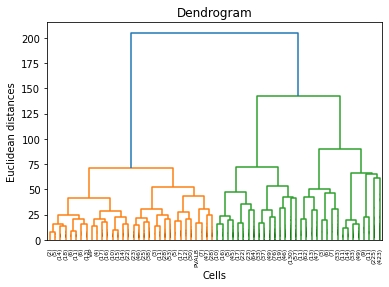

In [342]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
#dendrogram = sch.dendrogram(sch.linkage(X_transformed, method  = "ward"), p = 20, truncate_mode = "lastp", labels = np.array(y))
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method  = "ward"), p = 5, truncate_mode = "level", show_contracted = True, labels = np.array(y))
plt.title('Dendrogram')
plt.xlabel('Cells')
plt.ylabel('Euclidean distances')
plt.show()

In [343]:
dendrogram['leaves']
dendrogram['ivl']

['(2)',
 '(5)',
 '(14)',
 '(18)',
 '(6)',
 '(11)',
 '(6)',
 '(13)',
 'VIP',
 '(4)',
 '(17)',
 '(16)',
 '(10)',
 '(15)',
 '(14)',
 '(22)',
 '(23)',
 '(46)',
 '(25)',
 '(38)',
 '(3)',
 '(11)',
 '(28)',
 '(53)',
 '(5)',
 '(17)',
 '(12)',
 '(30)',
 'PVALB',
 '(7)',
 '(47)',
 '(28)',
 '(10)',
 '(16)',
 '(5)',
 '(45)',
 '(17)',
 '(22)',
 '(23)',
 '(64)',
 '(33)',
 '(37)',
 '(49)',
 '(76)',
 '(19)',
 '(46)',
 '(130)',
 '(57)',
 '(11)',
 '(62)',
 '(13)',
 '(47)',
 '(3)',
 '(6)',
 '(7)',
 '(33)',
 '(11)',
 '(14)',
 '(33)',
 '(49)',
 '(9)',
 '(11)',
 '(225)',
 '(423)']

values passed to leaf_label_func
leaves :  [35, 33, 30, 34]


'\n# create a label dictionary\ntemp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}\ndef llf(xx):\n    return "{} - custom label!".format(temp[xx])\n\n## This version gives you your label AND the count\n# temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}\n# def llf(xx):\n#     return "{} - {}".format(*temp[xx])\n\n\ndendrogram(\n            linked,\n            truncate_mode=\'lastp\',  # show only the last p merged clusters\n            p=p,  # show only the last p merged clusters\n            leaf_label_func=llf,\n            leaf_rotation=60.,\n            leaf_font_size=12.,\n            show_contracted=True,  # to get a distribution impression in truncated branches\n            )\nplt.show()'

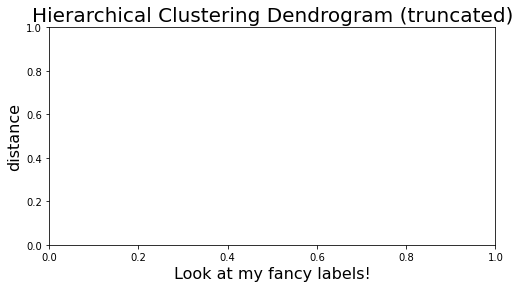

In [328]:
randomMatrix = np.random.uniform(-10,10,size=(20,3))
linked = sch.linkage(randomMatrix, 'ward')

labels = ["A", "B", "C", "D"]
p = len(labels)

plt.figure(figsize=(8,4))
plt.title('Hierarchical Clustering Dendrogram (truncated)', fontsize=20)
plt.xlabel('Look at my fancy labels!', fontsize=16)
plt.ylabel('distance', fontsize=16)

# call dendrogram to get the returned dictionary 
# (plotting parameters can be ignored at this point)
R = sch.dendrogram(
                linked,
                truncate_mode='lastp',  # show only the last p merged clusters
                p=p,  # show only the last p merged clusters
                no_plot=True,
                )

print("values passed to leaf_label_func\nleaves : ", R["leaves"])

'''
# create a label dictionary
temp = {R["leaves"][ii]: labels[ii] for ii in range(len(R["leaves"]))}
def llf(xx):
    return "{} - custom label!".format(temp[xx])

## This version gives you your label AND the count
# temp = {R["leaves"][ii]:(labels[ii], R["ivl"][ii]) for ii in range(len(R["leaves"]))}
# def llf(xx):
#     return "{} - {}".format(*temp[xx])


dendrogram(
            linked,
            truncate_mode='lastp',  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=60.,
            leaf_font_size=12.,
            show_contracted=True,  # to get a distribution impression in truncated branches
            )
plt.show()'''